In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/enz-eff-project
!pip install -r requirements.txt
%cd improved_code/preprocessing

/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 kB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
import numpy as np
from os.path import join

In [5]:
train_df = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "processed_train_df_kcat.pkl")
)
test_df = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "processed_test_df_kcat.pkl")
)
train_df.shape, test_df.shape

# Applying preprocessing


### analyze new input features

In [6]:
train_df.columns, test_df.columns

(Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
        'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
        'substrates',
        ...
        'socn_normalized', 'qso_combined', 'qso_normalized', 'traid_combined',
        'traid_normalized', 'paac_combined', 'paac_normalized', 'ESM1b_norm',
        'ESM1b_ts_norm', 'log10_kcat_norm'],
       dtype='object', length=2302),
 Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
        'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
        'substrates',
        ...
        'socn_normalized', 'qso_combined', 'qso_normalized', 'traid_combined',
        'traid_normalized', 'paac_combined', 'paac_normalized', 'ESM1b_norm',
        'ESM1b_ts_norm', 'log10_kcat_norm'],
       dtype='object', length=2302))

In [7]:
train_df.describe()

,maccs_key0,maccs_key1,maccs_key2,maccs_key3,maccs_key4,maccs_key5,maccs_key6,maccs_key7,maccs_key8,maccs_key9,...,773,774,775,776,777,geomean_kcat,frac_of_max_UID,frac_of_max_RID,frac_of_max_EC,log10_kcat_norm
count,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.0,3391.000000,3391.000000,...,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3391.000000,3.391000e+03
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008847,-0.001769,...,0.017104,0.011206,0.003539,0.004718,0.001180,1.016052,0.834185,0.800959,0.598084,-1.403903e-16
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099756,0.064239,...,0.134151,0.105280,0.064166,0.068538,0.042054,1.193057,0.272949,0.336095,0.680303,1.000000e+00
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.499398,0.100014,0.010286,0.010054,-2.946589e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.301030,0.707417,0.647276,0.100000,-5.993191e-01
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.064393,1.000000,1.000000,0.506024,4.051888e-02
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.819433,1.000000,1.000000,1.000000,6.733799e-01
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,...,2.000000,1.000000,2.000000,1.000000,2.000000,4.941511,1.000000,1.000000,8.647059,3.290252e+00


In [8]:
# new features indexing

reaction_details_old_features = train_df.columns[:15]
maccs_keys = train_df.columns[15:182]
chemical_descriptors = train_df.columns[182:372]
aa_composition = train_df.columns[372:392]
dp_composition = train_df.columns[392:792]
moreau_broto_auto = train_df.columns[792:1032]
moran_auto = train_df.columns[1032:1272]
geary_auto = train_df.columns[1272:1512]
ctd = train_df.columns[1512:1659]
paac = train_df.columns[1659:1689].append(train_df.columns[1719:1729])
apaac = train_df.columns[1689:1719]
socn = train_df.columns[1729:1819]
qso = train_df.columns[1819:1919]
traid = train_df.columns[1919:2262]
kcat_values_old_features = train_df.columns[2262:]


print("\nReaction Details and Old Features:", reaction_details_old_features)

print("\nMACCS Keys (Molecular Features):", maccs_keys)

print("\nChemical Descriptors (Molecular Features):", chemical_descriptors)

print("\nAA Composition (Protein Features):", aa_composition)

print("\nDP Composition (Protein Features):", dp_composition)

print("\nMoreau Broto Auto (Protein Features):", moreau_broto_auto)

print("\nMoran Auto (Protein Features):", moran_auto)

print("\nGeary Auto (Protein Features):", geary_auto)

print("\nCTD (Protein Features):", ctd)

print("\nPAAC (Protein Features):", paac)

print("\nAPAAC (Protein Features):", apaac)

print("\nSOCN (Protein Features):", socn)

print("\nQSO (Protein Features):", qso)

print("\nTRAID (Protein Features):", traid)

print("\nKCAT Values and Old Features:", kcat_values_old_features)


Reaction Details and Old Features: Index(['Reaction ID', 'Sequence ID', 'kcat_values', 'Uniprot IDs',
       'from_BRENDA', 'from_Sabio', 'from_Uniprot', 'checked', 'Sequence',
       'substrates', 'products', 'MW_frac', 'max_kcat_for_UID',
       'max_kcat_for_RID', 'ECs'],
      dtype='object')

MACCS Keys (Molecular Features): Index(['maccs_key0', 'maccs_key1', 'maccs_key2', 'maccs_key3', 'maccs_key4',
       'maccs_key5', 'maccs_key6', 'maccs_key7', 'maccs_key8', 'maccs_key9',
       ...
       'maccs_key157', 'maccs_key158', 'maccs_key159', 'maccs_key160',
       'maccs_key161', 'maccs_key162', 'maccs_key163', 'maccs_key164',
       'maccs_key165', 'maccs_key166'],
      dtype='object', length=167)

Chemical Descriptors (Molecular Features): Index(['chem_des0', 'chem_des1', 'chem_des2', 'chem_des3', 'chem_des4',
       'chem_des5', 'chem_des6', 'chem_des7', 'chem_des8', 'chem_des9',
       ...
       'chem_des180', 'chem_des181', 'chem_des182', 'chem_des183',
       'chem_des184'

In [9]:
def is_any_null_value_in_df(df):
    # Assuming train_df is your dataframe
    null_values = df.isnull().any()

    # Display features with null values
    features_with_null = null_values[null_values].index
    if not features_with_null.empty:
        print(f"Features with null values: {features_with_null}")
    else:
        print("No null values in the DataFrame.")


is_any_null_value_in_df(train_df)
is_any_null_value_in_df(test_df)

No null values in the DataFrame.
No null values in the DataFrame.


In [10]:
train_df.iloc[:12]

,Reaction ID,Sequence ID,kcat_values,Uniprot IDs,from_BRENDA,from_Sabio,from_Uniprot,checked,Sequence,substrates,...,socn_normalized,qso_combined,qso_normalized,traid_combined,traid_normalized,paac_combined,paac_normalized,ESM1b_norm,ESM1b_ts_norm,log10_kcat_norm
0,Reaction_3866,Sequence_2190,[17.0],[B0UET5],[0],[0],[1],[False],MPRRAEILRLPMAAPDDVSAIAASLRDGRLDPGDVVAVFAKTEGNG...,"{InChI=1S/C3H3N3O3/c7-1-4-2(8)6-3(9)5-1/h(H3,4...",...,"[-0.2113021138427653, -0.13907791786652848, -0...","[0.000569, 0.000244, 1.4e-05, 0.000168, 3.1e-0...","[-1.1917341422361336, -1.211666932544982, -1.2...","[18, 18, 7, 3, 3, 4, 1, 19, 5, 3, 0, 2, 6, 0, ...","[9.247911012575594, 9.247911012575594, 3.20357...","[10.151, 4.331, 0.271, 2.978, 0.541, 2.301, 0....","[2.7461241831910237, 0.6566278463453329, -0.80...","[0.15091662, 0.32457432, 0.44510972, -0.136967...","[-0.030173862, -0.89342, 0.5806902, 0.80567783...",0.179704
1,Reaction_2519,Sequence_938,"[0.42, 0.32]","[E0Y3X1, E0Y3X1]","[1, 1]","[0, 0]","[0, 0]","[False, False]",MTAPELRVDTFRAPEDAPKEPSAQQPRLPSSPSPAQALASYHHFPT...,{InChI=1S/C16H17N3O2/c20-15-14-6-3-7-19(14)16(...,...,"[0.478394635459242, 0.3156545125951945, 0.2844...","[0.000155, 0.000104, 5.1e-05, 0.000104, 9e-06,...","[-1.2171254505064821, -1.220253365293409, -1.2...","[0, 4, 2, 2, 3, 1, 0, 7, 5, 1, 0, 3, 6, 0, 2, ...","[-0.6428184186576754, 1.5551214549497179, 0.45...","[3.669, 2.446, 1.223, 2.446, 0.222, 3.002, 3.4...","[0.4189566135288642, -0.020124833200049767, -0...","[0.07542608, 0.3534585, 0.14502504, 0.07945917...","[1.0875534, -0.43753642, 0.037757665, -0.56130...",-1.216918
2,Reaction_3794,Sequence_3075,[119.0],[P83851],[0],[0],[1],[False],MPRKIILDCDPGIDDAVAIFLAHGNPEIELLAITTVVGNQSLEKVT...,{InChI=1S/C10H12N4O5/c15-1-4-6(16)7(17)10(19-4...,...,"[-0.37630759722740004, -0.5205167896217993, -0...","[0.000278, 0.000155, 0.000123, 0.000207, 5.2e-...","[-1.209581656020364, -1.2171254505064821, -1.2...","[8, 8, 3, 4, 3, 3, 1, 4, 2, 6, 1, 0, 5, 0, 3, ...","[3.753061328557111, 3.753061328557111, 1.00563...","[4.494, 2.496, 1.997, 3.328, 0.832, 2.829, 1.3...","[0.715148104576578, -0.0021738337426126255, -0...","[0.18122618, 0.06915038, 0.115337096, 0.140589...","[-0.15354922, 0.35074663, -1.0321883, 0.727111...",0.888050
3,Reaction_3694,Sequence_1106,"[76.0, 27.0]","[P07379, P07379]","[0, 0]","[0, 0]","[1, 1]","[False, False]",MPPQLHNGLDFSAKVIQGSLDSLPQEVRKFVEGNAQLCQPEYIHIC...,{InChI=1S/C10H16N5O14P3/c11-10-13-7-4(8(18)14-...,...,"[1.2611540834144404, 1.406587414723691, 1.2634...","[0.000114, 7e-05, 6.4e-05, 6.2e-05, 3.1e-05, 0...","[-1.2196400486685215, -1.222338641818027, -1.2...","[7, 6, 4, 1, 3, 3, 1, 6, 9, 5, 4, 5, 5, 0, 3, ...","[3.2035763601552625, 2.6540913917534144, 1.555...","[3.791, 2.29, 2.133, 2.054, 1.027, 4.107, 1.42...","[0.46275705220501095, -0.0761319515072539, -0....","[0.084962994, 0.2727167, 0.040427502, -0.17633...","[0.57776654, 0.9105199, -0.13267764, 0.1258054...",0.536468
4,Reaction_3789,Sequence_3709,[0.31],[B2KPR3],[0],[0],[1],[False],MVATIDSIEMPALPTAVEAHPMKGGDDSHSYSQNSCYQKGVIDAAK...,{InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)...,...,"[0.01942696576337789, 0.11233488823193247, -0....","[0.000148, 9.1e-05, 0.000161, 0.000133, 3.4e-0...","[-1.2175547721439035, -1.221050676905763, -1.2...","[3, 5, 2, 1, 2, 2, 0, 2, 9, 2, 3, 2, 3, 0, 0, ...","[1.0056364865478693, 2.1046064233515662, 0.456...","[2.952, 1.828, 3.234, 2.671, 0.703, 3.796, 1.8...","[0.16153928130921466, -0.24199918649397364, 0....","[0.12331506, 0.70785004, -0.3173143, -0.104997...","[-0.7559778, 0.1252086, 0.071796305, 1.3649503...",-1.277969
5,Reaction_56,Sequence_3272,"[5.1, 1.6]","[I3EBM6, I3EBM6]","[1, 1]","[0, 0]","[0, 0]","[False, False]",MPLVSMTEMLNKAKAEGYAVGQFNLNNLEFTQAILLAAEEEKSPVI...,"{InChI=1S/C6H14O12P2/c7-4-3(1-16-19(10,11)12)1...",...,"[-0.5007617202372997, -0.4252168715725002, -0....","[0.000297, 0.000108, 0.000142, 0.000142, 3.7e-...","[-1.2084163544330777, -1.220008038643454, -1.2...","[3, 5, 3, 3, 1, 2, 0, 6, 4, 5, 2, 3, 2, 0, 7, 

In [ ]:
index_ranges = {
    'maccs_keys': slice(15, 182),
    'chemical_descriptors': slice(182, 372),
    'aa_composition': slice(372, 392),
    'dp_composition': slice(392, 792),
    'moreau_broto_auto': slice(792, 1032),
    'moran_auto': slice(1032, 1272),
    'geary_auto': slice(1272, 1512),
    'ctd': slice(1512, 1659),
    'paac_1': slice(1659, 1689),
    'apaac': slice(1689, 1719),
    'paac_2': slice(1719, 1729),
    'socn': slice(1729, 1819),
    'qso': slice(1819, 1919),
    'traid': slice(1919, 2262),
}


def create_filtered_dfs(data_df, index_ranges):
    '''Function to create filtered DataFrames for train and test data'''
    filtered_dfs = {}
    for key, index_range in index_ranges.items():
        filtered_dfs[key] = data_df.iloc[:, index_range]
    return filtered_dfs


def concatenate_paac_features(df, paac_feats):
    '''Function to concatenate PAAC features for train and test data'''
    paac_concat_df = pd.concat([df[paac_feats[0]], df[paac_feats[1]]], axis=1)

    # adding concatenated paac key for train and test df
    df['paac'] = paac_concat_df

    # deleting the paac feats
    for key in paac_feats:
        df.pop(key)

    return df



train_dfs = create_filtered_dfs(train_df, index_ranges)
test_dfs = create_filtered_dfs(test_df, index_ranges)


paac_feats = ["paac_1", "paac_2"]
train_dfs = concatenate_paac_features(train_dfs, paac_feats)
test_dfs = concatenate_paac_features(test_dfs, paac_feats)


train_dfs.keys(), test_dfs.keys()

(dict_keys(['maccs_keys', 'chemical_descriptors', 'aa_composition', 'dp_composition', 'moreau_broto_auto', 'moran_auto', 'geary_auto', 'ctd', 'apaac', 'socn', 'qso', 'traid', 'paac']),
 dict_keys(['maccs_keys', 'chemical_descriptors', 'aa_composition', 'dp_composition', 'moreau_broto_auto', 'moran_auto', 'geary_auto', 'ctd', 'apaac', 'socn', 'qso', 'traid', 'paac']))

### Concatenate and Normalize the new features

**normalization by subtract mean and divide by standard deviation method.**

In [ ]:
#  Normalizing new-input features
def normalize_feature(df, feature_df, feature_name):
    # concatenating the features
    df[f'{feature_name}_combined'] = feature_df.apply(
        lambda row: row.tolist(), axis=1
        )
    feature_arr = np.array(df[f'{feature_name}_combined'].tolist())

    # Calculate mean and std for the current feature dataframe
    mean, std = feature_arr.mean(), feature_arr.std()

    # Apply normalization using the calculated mean and std
    df[f'{feature_name}_normalized'] = df[f'{feature_name}_combined'].apply(
        lambda x: (x - mean) / std
    )
    return df


def get_processed_df(dfs_dict, df):
    # Apply normalization function for each feature for train data
    for feature_name, feature_df in dfs_dict.items():
        df = normalize_feature(df, feature_df, feature_name)
    return df


processed_train_df = get_processed_df(train_dfs, train_df)
processed_test_df = get_processed_df(test_dfs, test_df)

In [ ]:
#  Normalizing old-input features

def get_feat_stats(df, feat):
    feat_arr = np.array(df[feat].tolist())
    mean, std = feat_arr.mean(), feat_arr.std()
    return mean, std


def normalize_features(feat_list, feat_mean, feat_std):
    norm_feat_list = (feat_list - feat_mean)/feat_std
    return norm_feat_list


# train dataset
mean, std = get_feat_stats(processed_train_df, 'ESM1b')
processed_train_df['ESM1b_norm'] = processed_train_df['ESM1b'].apply(
    lambda x: normalize_features(x, mean, std))


mean, std = get_feat_stats(processed_train_df, 'ESM1b_ts')
processed_train_df['ESM1b_ts_norm'] = processed_train_df['ESM1b_ts'].apply(
    lambda x: normalize_features(x, mean, std))


# test dataset
mean, std = get_feat_stats(processed_test_df, 'ESM1b')
processed_test_df['ESM1b_norm'] = processed_test_df['ESM1b'].apply(
    lambda x: normalize_features(x, mean, std))


mean, std = get_feat_stats(processed_test_df, 'ESM1b_ts')
processed_test_df['ESM1b_ts_norm'] = processed_test_df['ESM1b_ts'].apply(
    lambda x: normalize_features(x, mean, std))


In [ ]:
#  Normalizing output feature

def calcuate_stats(feat_series):
    mean = feat_series.mean()
    std = feat_series.std()
    return mean, std


mean, std = calcuate_stats(processed_train_df['geomean_kcat'])
processed_train_df['log10_kcat_norm'] = processed_train_df['geomean_kcat'].apply(
        lambda x: (x - mean) / std
    )


mean, std = calcuate_stats(processed_test_df['geomean_kcat'])
processed_test_df['log10_kcat_norm'] = processed_test_df['geomean_kcat'].apply(
        lambda x: (x - mean) / std
    )



In [ ]:
processed_train_df.shape, processed_test_df.shape

((3417, 2302), (839, 2302))

### Finding correlation between new input features and output feature

In [ ]:
new_feature_columns = [
        'maccs_keys_normalized',
        'chemical_descriptors_normalized',
        'aa_composition_normalized',
        'dp_composition_normalized',
        'moreau_broto_auto_normalized',
        'moran_auto_normalized',
        'geary_auto_normalized',
        'ctd_normalized',
        'paac_normalized',
        'apaac_normalized',
        'socn_normalized',
        'qso_normalized',
        'traid_normalized',
    ]


In [ ]:
def calculate_correlation(df):
    """
    Calculate the correlation between the mean of each feature and the output feature.

    Parameters
    ----------
    df: pandas.DataFrame
        The data frame containing the input and output features.

    Returns
    -------
    None
        Prints the correlation values to the console.

    """
    # List of combined and normalized features
    new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
    ]

    # Calculate mean for each feature and find correlation with the output feature
    output_feature = df["log10_kcat_norm"]
    for new_feature in new_feature_columns:
        concat_features = np.concatenate(
            [
                np.array(df["ESM1b_ts_norm"].tolist()),
                np.array(df["DRFP"].tolist()),
                np.array(df[new_feature].tolist()),
            ],
            axis=1,
        )
        concat_features_means = np.mean(concat_features, axis=1)
        correlation_value = np.corrcoef(concat_features_means, output_feature)[0, 1]
        print(
            f"Correlation between mean({new_feature}) and log10_kcat_norm: {correlation_value}"
        )


print("\ntrain:")
calculate_correlation(processed_train_df)

print("\ntest")
calculate_correlation(processed_test_df)



train:
Correlation between mean(maccs_keys_normalized) and log10_kcat_norm: -0.10969479016801437
Correlation between mean(chemical_descriptors_normalized) and log10_kcat_norm: -0.13295241094118487
Correlation between mean(aa_composition_normalized) and log10_kcat_norm: -0.14079619701621596
Correlation between mean(dp_composition_normalized) and log10_kcat_norm: -0.1388513586905356
Correlation between mean(moreau_broto_auto_normalized) and log10_kcat_norm: -0.03468457286733419
Correlation between mean(moran_auto_normalized) and log10_kcat_norm: -0.1568056602750553
Correlation between mean(geary_auto_normalized) and log10_kcat_norm: -0.018099401470593753
Correlation between mean(ctd_normalized) and log10_kcat_norm: -0.14009682617281025
Correlation between mean(paac_normalized) and log10_kcat_norm: -0.13578281343885804
Correlation between mean(apaac_normalized) and log10_kcat_norm: -0.1408577143782893
Correlation between mean(socn_normalized) and log10_kcat_norm: -0.05130286411734002
Cor

In [ ]:
new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
        'ESM1b_ts_norm',
        'DRFP',
        'difference_fp',
        'structural_fp'
    ]


def calculate_mean(lst):
    return sum(lst) / len(lst)


def calcuate_mean_features(df, feat_cols):
    df_mean_feats = {}
    cols = df.columns
    for feat_col in feat_cols:
        if feat_col in cols:
            df_mean_feats[f'mean_{feat_col}'] = df[feat_col].apply(lambda x: calculate_mean(x))

    return df_mean_feats


def get_updated_df(df):
    """
    Calculate the correlation between the mean of each feature and the output feature.

    Parameters
    ----------
    df: pandas.DataFrame
        The data frame containing the input and output features.

    Returns
    -------
    None
        Prints the correlation values to the console.

    """
    # List of combined and normalized features
    new_feature_columns = [
        "maccs_keys_normalized",
        "chemical_descriptors_normalized",
        "aa_composition_normalized",
        "dp_composition_normalized",
        "moreau_broto_auto_normalized",
        "moran_auto_normalized",
        "geary_auto_normalized",
        "ctd_normalized",
        "paac_normalized",
        "apaac_normalized",
        "socn_normalized",
        "qso_normalized",
        "traid_normalized",
        'ESM1b_ts_norm',
        'DRFP',
        'difference_fp',
        'structural_fp'

    ]
    updated_df = calcuate_mean_features(df, new_feature_columns)
    updated_df['log10_kcat_norm'] = df["log10_kcat_norm"].tolist()

    return pd.DataFrame(updated_df)


print("\ntrain:")
updated_df = get_updated_df(processed_train_df)

updated_df.corr()


train:


,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_apaac_normalized,mean_socn_normalized,mean_qso_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,0.077987,-0.012909,0.017624,-0.033305,-0.041914,-0.003889,0.000999,-0.011037,0.011035,-0.017450,0.005679,-0.020048,0.018270,0.000873,-0.197171,-0.047309,-0.029106
mean_chemical_descriptors_normalized,0.077987,1.000000,-0.010267,0.003888,-0.024113,0.002633,-0.000179,-0.006355,-0.002716,0.002716,-0.009339,0.001160,-0.014076,0.016127,-0.060250,-0.279794,-0.028584,0.001260
mean_aa_composition_normalized,-0.012909,-0.010267,1.000000,0.012691,0.004961,-0.009507,-0.023622,0.027540,-0.038170,0.038290,-0.000695,-0.000086,0.004712,0.010661,0.053415,0.012045,0.040310,0.007866
mean_dp_composition_normalized,0.017624,0.003888,0.012691,1.000000,-0.244680,-0.033095,0.199981,-0.053200,-0.057397,0.057397,0.020249,0.171007,0.009919,-0.040613,0.017573,0.005755,-0.031938,0.035111
mean_moreau_broto_auto_normalized,-0.033305,-0.024113,0.004961,-0.244680,1.000000,0.176575,-0.014012,-0.004294,0.049010,-0.049010,-0.011729,0.023774,0.025579,-0.019453,-0.040945,-0.017882,0.007996,0.000597
mean_moran_auto_normalized,-0.041914,0.002633,-0.009507,-0.033095,0.176575,1.000000,0.014375,0.199185,0.092374,-0.092373,0.310214,0.176791,0.311745,-0.082261,-0.003004,-0.038563,0.040720,-0.070615
mean_geary_auto_normalized,-0.003889,-0.000179,-0.023622,0.199981,-0.014012,0.014375,1.000000,0.221936,0.528485,-0.528492,0.122766,0.817905,0.123528,-0.237455,-0.078248,0.021795,-0.051138,0.034939
mean_ctd_normalized,0.000999,-0.006355,0.027540,-0.053200,-0.004294,0.199185,0.221936,1.000000,0.206247,-0.206236,0.303275,0.128314,0.308624,-0.121483,-0.022172,0.017128,0.010911,0.019861
mean_paac_normalized,-0.011037,-0.002716,-0.038170,-0.057397,0.049010,0.092374,0.528485,0.206247,1.000000,-1.000000,0.099691,0.497655,0.100484,-0.113786,-0.043844,0.026175,-0.012853,0.017396
mean_apaac_normalized,0.011035,0.002716,0.038290,0.057397,-0.049010,-0.092373,-0.528492,-0.206236,-1.000000,1.000000,-0.099693,-0.497655,-0.100485,0.113780,0.043857,-0.026172,0.012864,-0.017396


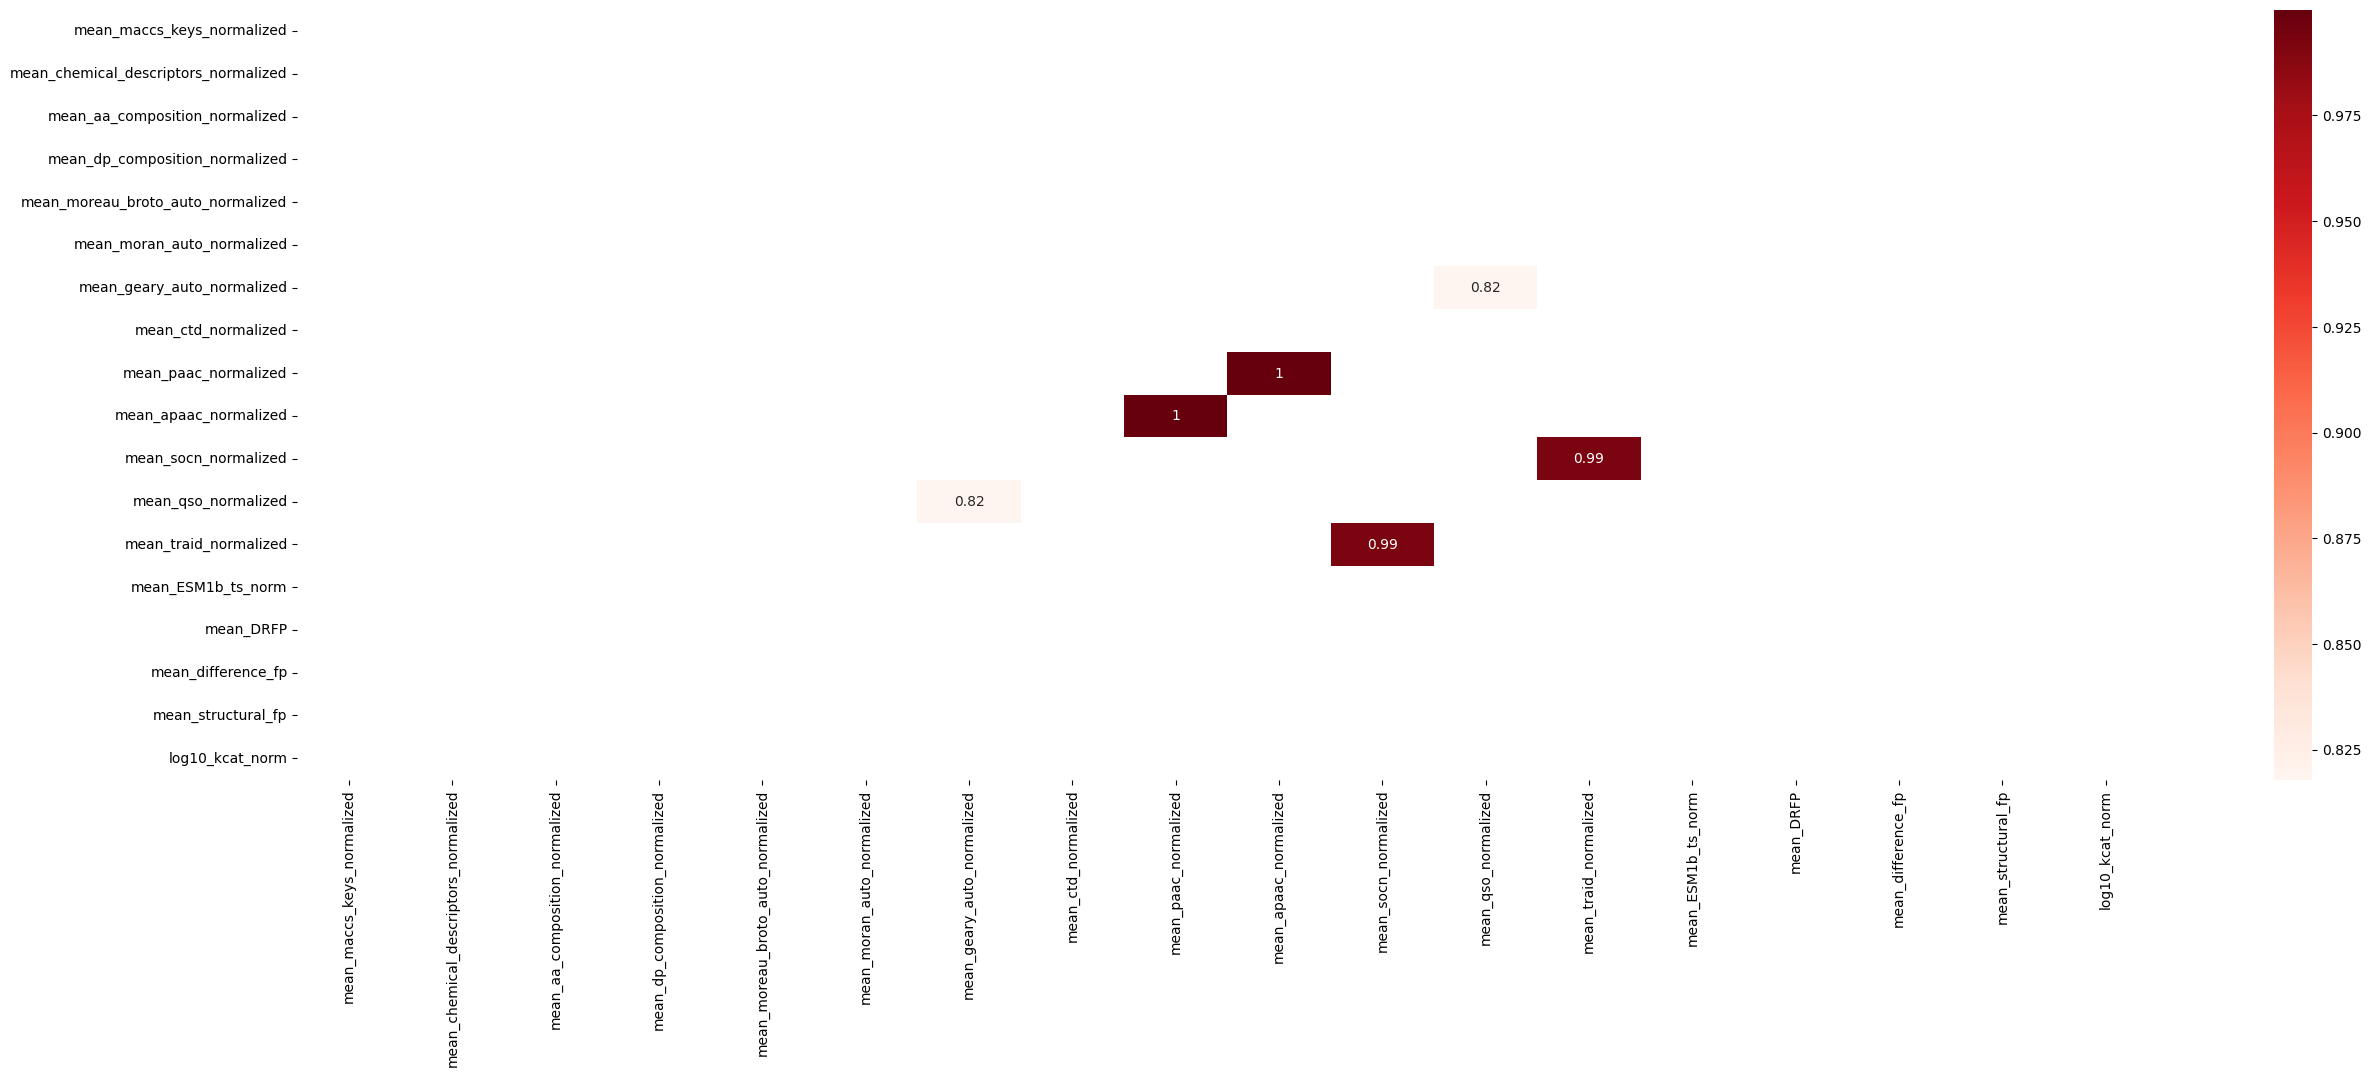

In [ ]:
dfCorr = updated_df.corr().abs()
filteredDf = dfCorr[(dfCorr >= .8) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

Features which have high correlation coeffient values between them, we can ignore one of them
- mean_geary_auto_normalized vs mean_qso_normalized (0.82)
- mean_paac_normalized vs mean_apaac_normalized (1)
- mean_socn_normalized vs mean_traid_normalized (0.99)

Above features correlation coefficient with output feature are:
- mean_geary_auto_normalized :  0.034939
- mean_qso_normalized : 0.023000
- mean_paac_normalized : -0.017396
- mean_apaac_normalized :  -0.017396
- mean_socn_normalized : 0.001154
- mean_traid_normalized: 0.011748


only keep high correlated features with output which will be following
- mean_geary_auto_normalized
- mean_paac_normalized
- traid_normalized

feats_to_ignore = ["qso_normalized", "apaac_normalized", "socn_normalized"]

In [ ]:
high_self_corr_feats = ["qso_normalized", "apaac_normalized", "socn_normalized"]

In [ ]:
low_correlation_coeff_with_output = ["mean_moreau_broto_auto_normalized", "mean_chemical_descriptors_normalized", "mean_aa_composition_normalized"]

In [ ]:
all_new_feats = [
    "maccs_keys_normalized",
    "chemical_descriptors_normalized",
    "aa_composition_normalized",
    "dp_composition_normalized",
    "moreau_broto_auto_normalized",
    "moran_auto_normalized",
    "geary_auto_normalized",
    "ctd_normalized",
    "paac_normalized",
    "apaac_normalized",
    "socn_normalized",
    "qso_normalized",
    "traid_normalized",
    "ESM1b_ts_norm",
    "ESM1b_norm",
    "DRFP",
    "difference_fp",
    "structural_fp",
    "log10_kcat_norm"
]



feats_to_ignore = high_self_corr_feats + low_correlation_coeff_with_output

selected_features = set.difference(set(all_new_feats), set(feats_to_ignore))
selected_features

{'DRFP',
 'ESM1b_norm',
 'ESM1b_ts_norm',
 'aa_composition_normalized',
 'chemical_descriptors_normalized',
 'ctd_normalized',
 'difference_fp',
 'dp_composition_normalized',
 'geary_auto_normalized',
 'log10_kcat_norm',
 'maccs_keys_normalized',
 'moran_auto_normalized',
 'moreau_broto_auto_normalized',
 'paac_normalized',
 'structural_fp',
 'traid_normalized'}

In [ ]:
# Subsetting the DataFrame with selected features
train_selected_df = processed_train_df[list(selected_features)]
train_updated_df = get_updated_df(train_selected_df)
train_updated_df.corr()

,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,0.077987,-0.012909,0.017624,-0.033305,-0.041914,-0.003889,0.000999,-0.011037,-0.020048,0.018270,0.000873,-0.197171,-0.047309,-0.029106
mean_chemical_descriptors_normalized,0.077987,1.000000,-0.010267,0.003888,-0.024113,0.002633,-0.000179,-0.006355,-0.002716,-0.014076,0.016127,-0.060250,-0.279794,-0.028584,0.001260
mean_aa_composition_normalized,-0.012909,-0.010267,1.000000,0.012691,0.004961,-0.009507,-0.023622,0.027540,-0.038170,0.004712,0.010661,0.053415,0.012045,0.040310,0.007866
mean_dp_composition_normalized,0.017624,0.003888,0.012691,1.000000,-0.244680,-0.033095,0.199981,-0.053200,-0.057397,0.009919,-0.040613,0.017573,0.005755,-0.031938,0.035111
mean_moreau_broto_auto_normalized,-0.033305,-0.024113,0.004961,-0.244680,1.000000,0.176575,-0.014012,-0.004294,0.049010,0.025579,-0.019453,-0.040945,-0.017882,0.007996,0.000597
mean_moran_auto_normalized,-0.041914,0.002633,-0.009507,-0.033095,0.176575,1.000000,0.014375,0.199185,0.092374,0.311745,-0.082261,-0.003004,-0.038563,0.040720,-0.070615
mean_geary_auto_normalized,-0.003889,-0.000179,-0.023622,0.199981,-0.014012,0.014375,1.000000,0.221936,0.528485,0.123528,-0.237455,-0.078248,0.021795,-0.051138,0.034939
mean_ctd_normalized,0.000999,-0.006355,0.027540,-0.053200,-0.004294,0.199185,0.221936,1.000000,0.206247,0.308624,-0.121483,-0.022172,0.017128,0.010911,0.019861
mean_paac_normalized,-0.011037,-0.002716,-0.038170,-0.057397,0.049010,0.092374,0.528485,0.206247,1.000000,0.100484,-0.113786,-0.043844,0.026175,-0.012853,0.017396
mean_traid_normalized,-0.020048,-0.014076,0.004712,0.009919,0.025579,0.311745,0.123528,0.308624,0.100484,1.000000,-0.004166,-0.098910,-0.028487,-0.109951,0.011748


In [ ]:
# Subsetting the DataFrame with selected features
test_selected_df = processed_test_df[list(selected_features)]
test_updated_df = get_updated_df(test_selected_df)
test_updated_df.corr()

,mean_maccs_keys_normalized,mean_chemical_descriptors_normalized,mean_aa_composition_normalized,mean_dp_composition_normalized,mean_moreau_broto_auto_normalized,mean_moran_auto_normalized,mean_geary_auto_normalized,mean_ctd_normalized,mean_paac_normalized,mean_traid_normalized,mean_ESM1b_ts_norm,mean_DRFP,mean_difference_fp,mean_structural_fp,log10_kcat_norm
mean_maccs_keys_normalized,1.000000,-0.026998,0.047434,0.039118,-0.075139,-0.012180,0.020442,0.082742,0.043628,-0.010497,0.038065,0.029485,-0.028714,-0.110243,0.013822
mean_chemical_descriptors_normalized,-0.026998,1.000000,-0.048168,0.011565,-0.019873,0.039473,-0.038354,0.047446,-0.001797,0.001619,-0.008766,0.017916,-0.107903,-0.102524,0.067745
mean_aa_composition_normalized,0.047434,-0.048168,1.000000,0.056063,-0.040379,0.022013,-0.003283,0.058561,0.061414,-0.003526,0.056367,-0.007407,0.036820,-0.067587,0.015815
mean_dp_composition_normalized,0.039118,0.011565,0.056063,1.000000,-0.251555,-0.108507,0.118352,-0.010024,0.000630,0.052581,0.042819,-0.049556,0.051078,-0.056760,0.028746
mean_moreau_broto_auto_normalized,-0.075139,-0.019873,-0.040379,-0.251555,1.000000,0.221764,-0.100304,0.055885,0.089460,0.024493,-0.007397,-0.050617,-0.015424,-0.034582,0.067971
mean_moran_auto_normalized,-0.012180,0.039473,0.022013,-0.108507,0.221764,1.000000,-0.608622,0.112389,0.116698,0.207392,-0.091077,-0.018114,-0.101430,0.020345,-0.075067
mean_geary_auto_normalized,0.020442,-0.038354,-0.003283,0.118352,-0.100304,-0.608622,1.000000,0.130198,-0.025813,0.131805,-0.024801,-0.073628,0.080527,-0.107444,0.151212
mean_ctd_normalized,0.082742,0.047446,0.058561,-0.010024,0.055885,0.112389,0.130198,1.000000,0.122394,0.272475,0.044683,0.089537,0.134198,-0.013957,-0.041325
mean_paac_normalized,0.043628,-0.001797,0.061414,0.000630,0.089460,0.116698,-0.025813,0.122394,1.000000,0.060544,0.040974,-0.016885,-0.026442,-0.057929,-0.006058
mean_traid_normalized,-0.010497,0.001619,-0.003526,0.052581,0.024493,0.207392,0.131805,0.272475,0.060544,1.000000,-0.039493,-0.027166,-0.008804,-0.039895,0.022508


In [ ]:
test_selected_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_cnn_features.pkl"))
train_selected_df.to_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_cnn_features.pkl"))

# CNN

In [ ]:
!ls ../

Inference  model_training  preprocessing


In [12]:
%cd ../model_training

import random
random.seed(42)  # define seed

import numpy as np
np.random.seed(42)  # define seed

import tensorflow as tf
tf.random.set_seed(42)  # define seed

# Reduce randomness due the GPU manipulation
tf.config.experimental.enable_tensor_float_32_execution(False)
tf.config.optimizer.set_jit(False)
tf.config.experimental.list_physical_devices('GPU')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Set to the desired GPU device
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
import warnings
warnings.filterwarnings("ignore")
import gc
import keras
keras.utils.set_random_seed(42)
import pandas as pd
from os.path import join
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import save_model
from tensorflow.keras.initializers import glorot_normal
from tensorflow import keras
from scipy.optimize import minimize
from utils import (get_processed_data,
                   create_model,
                   save_best_params,
                   is_not_require_params,
                   train_model,
                   calculate_weighted_mean,
                   evaluate_model,
                   get_model_preds,
                   delete_file,
                   empty_directory,
                   )


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training


In [13]:
#  remove the features which have low correlation and high corelation with other features
# data_train = train_selected_df.copy()
# data_test = test_selected_df.copy()

# all features
# data_train = processed_train_df[all_new_feats]
# data_test = processed_test_df[all_new_feats]

# data_train.columns

In [14]:
data_train = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "processed_train_df_kcat.pkl")
)
data_test = pd.read_pickle(
    join("..", "..", "data", "kcat_data", "splits", "processed_test_df_kcat.pkl")
)

In [15]:
def find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=100,
    skip_iterations=0,

):
    """
    This function performs hyperparameter tuning.

    Parameters:
    train_inputs (numpy array): training input data
    test_inputs (numpy array): testing input data
    train_output (numpy array): training output data
    test_output (numpy array): testing output data
    best_model_path (string): path to save the best model
    best_hyperparameter_path (string): path to save the best hyperparameters

    Returns:
    best_hyperparameter (dict): Dictionary of best hyperparameter.

    """
    # Process train and test dataset
    train_X, train_Y = get_processed_data(train_inputs, train_output)
    test_X, test_Y = get_processed_data(test_inputs, test_output)
    n_timesteps, n_features = train_X.shape[1], train_X.shape[2]

    # Define the hyperparameter search space
    PARAM_SPACE = {
        "filters_1": list(range(2, 15, 2)),
        "filters_2": list(range(4, 25, 2)),
        "filters_3": list(range(8, 35, 2)),
        "kernel_size_1": list(range(3, 19, 2)),
        "kernel_size_2": list(range(5, 17, 2)),
        "kernel_size_3": list(range(7, 15, 2)),
        "dense_units_1": [64, 128, 256, 512],
        "dense_units_2": [8, 16, 32, 64, 128, 256],
        "dropout_rate": [0.10, 0.2, 0.3, 0.4, 0.5],
        "optimizer": ["nadam", "adam", "rmsprop"],
        "batch_size": [8, 16, 24, 32, 64, 128],
    }

    # To avoid processing duplicate parameters
    processed_params = []
    best_r2 = 0
    best_hyper_params = None
    iteration = 0

    while iteration < total_iterations:
        # Randomly select parameters from the parameter space
        hyper_params = {
            key: np.random.choice(value) for key, value in PARAM_SPACE.items()
        }

        # Skip if parameters are already processed or not required
        if hyper_params in processed_params or is_not_require_params(hyper_params):
            continue

        iteration += 1
        # Mark parameters as processed
        processed_params.append(hyper_params)

        if iteration < skip_iterations:
            continue

        print(f"Iteration-{iteration}...")

        # Create and train model
        model = create_model(n_timesteps, n_features, **hyper_params)
        model = train_model(model, train_X, train_Y, test_X, test_Y, hyper_params)
        y_pred = model.predict(test_X).reshape(-1)
        curr_r2 = round(r2_score(test_Y, y_pred), 2)

        # Update best parameters if current R2 score is better
        if curr_r2 > best_r2:
            best_r2, best_hyper_params = curr_r2, hyper_params
            save_best_params(best_hyperparameter_path, best_hyper_params, best_r2)
            save_model(model, best_model_path)
            print(f"New best R2 score: {best_r2}")
            print(f"New Best hyperparameters: {best_hyper_params}")




    print("Hyperparameter tuning completed.")
    return best_hyper_params


In [16]:
def start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
):
    """
    Train multiple models, create an ensemble, and evaluate its performance.

    Parameters:
        train_inputs (list): List of training input data.
        test_inputs (list): List of testing input data.
        train_output (numpy.ndarray): Training output data.
        test_output (numpy.ndarray): Testing output data.
        total_models (int): Total number of models to train.
        model_dir (str): Path to the directory containing trained models.
        hyper_params (dict): Dictionary containing hyperparameters for model training.

    Returns:
        tuple: A tuple containing weighted average predictions and ensemble output.
            - weighted_avg_pred (numpy.ndarray): Weighted average predictions.
            - ensemble_output (float): Ensemble output evaluation result.
    """
    # Process train and test dataset
    train_X, train_Y = get_processed_data(train_inputs, train_output)
    test_X, test_Y = get_processed_data(test_inputs, test_output)
    n_timesteps, n_features = train_X.shape[1], train_X.shape[2]

    # Getting the CNN model architecture
    model = create_model(n_timesteps, n_features, **hyper_params)

    # Train and get model predictions
    model_preds = get_model_preds(
        model_dir, hyper_params, total_models, model, train_X, train_Y, test_X, test_Y
    )

    # Calculate weighted mean model predictions
    weighted_avg_pred = calculate_weighted_mean(model_preds, test_Y)
    # print("Weighted Average Predictions: ", weighted_avg_pred)

    # Output predictions
    ensemble_output = evaluate_model(weighted_avg_pred, test_Y)
    print(f"Model score: {ensemble_output}")

    return weighted_avg_pred

## ESM1b_ts + Structural FP + new features

### Hyperparameter tuning

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_maccs.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_maccs.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_un

### Training


In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 10, 'filters_2': 12, 'filters_3': 18, 'kernel_size_1': 15, 'kernel_size_2': 5, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 64}



esm1bts_struct_maccs = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 5ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}


KeyboardInterrupt: 

### Hyperparameter tuning

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moran.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moran.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["moran_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["moran_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-0...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.35
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 

### Training

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["moran_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["moran_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 2, 'filters_2': 4, 'filters_3': 24, 'kernel_size_1': 7, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 128}



esm1bts_struct_moran = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_paac.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 2ms/step
Iteration-7...
27/27 [==============================] - 0s 3ms/step
Iteration-8...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 6, 'filters_3': 28, 'kernel_size_1': 15, 'k

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params =  {'filters_1': 12, 'filters_2': 16, 'filters_3': 32, 'kernel_size_1': 7, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 24}


esm1bts_struct_paac = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)






KeyboardInterrupt: 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["traid_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["traid_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 5ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s

In [ ]:

# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["traid_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["traid_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params =   {'filters_1': 8, 'filters_2': 12, 'filters_3': 20, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}



esm1bts_struct_traid = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)






27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 5.62608605e-01]
 [-1.70640116e-01]
 [-9.24318467e-01]
 [ 1.18437289e+00]
 [-2.57096731e-01]
 [ 2.77707912e-01]
 [ 2.48817691e-01]
 [ 4.30423838e-01]
 [ 5.67117352e-01]
 [ 4.25509622e-01]
 [ 6.29152955e-01]
 [-4.52030699e-01]
 [ 6.64033442e-01]
 [ 6.92677187e-01]
 [ 3.06405076e-01]
 [ 5.85583012e-01]
 [ 3.72277335e-01]
 [ 4.27398630e-02]
 [-1.20674210e-01]
 [ 3.63978483e-01]
 [ 2.50956139e-02]
 [-3.42543363e-02]
 [-4.69665843e-02]
 [ 6.28656615e-01]
 [ 1.60017692e-01]
 [-4.19354244e-01]
 [-1.60657310e+00]
 [-1.88165330e+00]
 [ 1.57075278e-01]
 [ 3.81839665e-01]
 [ 9.2501

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["dp_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)



Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["dp_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=240,
    skip_iterations=118,
)




Iteration-118...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.37
New Best hyperparameters: {'filters_1': 2, 'filters_2': 22, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 8}
Iteration-119...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 2, 'filters_2': 6, 'filters_3': 12, 'kernel_size_1': 9, 'kernel_size_2': 7, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-120...
27/27 [==============================] - 0s 3ms/step
Iteration-121...
27/27 [==============================] - 0s 4ms/step
Iteration-122...
27/27 [==============================] - 0s 3ms/step
Iteration-123...
27/27 [==============================] - 0s 5ms/step
Iteration-124...
27/27 [============================

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["dp_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"
hyper_params = {'filters_1': 2, 'filters_2': 8, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 64}




esm1bts_struct_dpcomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)






27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 6ms/step
Model-2 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.65}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.58, 'R2 score': 0.42, 'pearson coefficient': 0.65}
Weighted Average Predictions:  [[ 6.51857969e-01]
 [-2.79447656e-01]
 [-7.25971510e-01]
 [ 1.35666817e+00]
 [ 2.22995520e-01]
 [-1.69251393e-04]
 [-4.04782603e-01]
 [ 1.90369311e-01]
 [ 7.28271286e-01]
 [ 7.74576202e-01]
 [ 7.67516652e-01]
 [-3.79819434e-01]
 [ 6.06111646e-01]
 [ 3.06354979e-01]
 [-4.50324899e-02]
 [ 7.32159087e-01]
 [ 4.58201673e-01]
 [-8.54406909e-02]
 [ 3.34054738e-01]
 [ 5.31570012e-01]
 [ 3.78294630e-01]
 [-2.44860162e-01]
 [-1.52270394e-01]
 [ 9.24344790e-01]
 [ 3.20985687e-01]
 [-6.18855870e-01]
 [-1.13532638e+00]
 [-1.90925843e+00]
 [-1.99973735e-01]
 [ 3.48922195e-01]
 [-4.1056

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_aa_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_aa_comp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.45
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] 

In [17]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 6, 'filters_2': 12, 'filters_3': 26, 'kernel_size_1': 15, 'kernel_size_2': 5, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 32, 'dropout_rate': 0.1, 'optimizer': 'nadam', 'batch_size': 8}


esm1bts_struct_aacomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




28/28 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.6, 'R2 score': 0.4, 'pearson coefficient': 0.63}
28/28 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.58, 'R2 score': 0.42, 'pearson coefficient': 0.65}
28/28 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.58, 'R2 score': 0.42, 'pearson coefficient': 0.65}
Model score: {'mse': 0.58, 'R2 score': 0.42, 'pearson coefficient': 0.65}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_chem.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_aa_chem.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["chemical_descriptors_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=41
)






Iteration-0...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_un

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_chem.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_aa_chem.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["chemical_descriptors_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=41
)




Iteration-41...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 2, 'filters_2': 16, 'filters_3': 18, 'kernel_size_1': 5, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 64, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-42...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 4, 'filters_2': 8, 'filters_3': 24, 'kernel_size_1': 11, 'kernel_size_2': 7, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-43...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 8, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 3, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size'

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["chemical_descriptors_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1bts_struct_chem_des = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 5ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 6ms/step
Model-2 results {'mse': 0.65, 'R2 score': 0.35, 'pearson coefficient': 0.59}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.59, 'R2 score': 0.41, 'pearson coefficient': 0.64}
Weighted Average Predictions:  [[ 6.85624937e-01]
 [-1.53590398e-01]
 [-4.08765721e-01]
 [ 1.68924445e+00]
 [ 2.45072498e-01]
 [-6.87233436e-02]
 [-3.21560801e-02]
 [-2.94528319e-01]
 [ 6.02183656e-01]
 [ 9.12658100e-02]
 [ 5.37054611e-01]
 [-2.21174244e-01]
 [ 6.17383261e-01]
 [ 4.13845352e-01]
 [-2.63198950e-01]
 [ 6.15228504e-01]
 [ 5.22026641e-01]
 [ 1.69611626e-01]
 [ 2.89201941e-01]
 [ 3.05142250e-01]
 [ 1.23393538e-01]
 [-4.22438116e-02]
 [-3.01244545e-01]
 [ 5.94177946e-01]
 [ 5.27212773e-02]
 [-8.99976170e-01]
 [-1.61846019e+00]
 [-1.63764127e+00]
 [ 4.83394703e-01]
 [ 9.24665347e-01]
 [ 1.9535

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_ctd.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["ctd_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.37
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 5ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["ctd_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 4, 'filters_2': 4, 'filters_3': 34, 'kernel_size_1': 7, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'adam', 'batch_size': 128}


esm1bts_struct_ctd = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)





27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct_geary.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct_geary.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["geary_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["geary_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)



Iteration-0...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 4ms/step
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 5ms/step
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct_geary.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct_geary.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["geary_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["geary_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=48,
)



Iteration-48...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 12, 'filters_2': 18, 'filters_3': 28, 'kernel_size_1': 3, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 64}
Iteration-49...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 4, 'filters_2': 18, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-50...
27/27 [==============================] - 0s 3ms/step
Iteration-51...
27/27 [==============================] - 0s 4ms/step
Iteration-52...
27/27 [==============================] - 0s 3ms/step
Iteration-53...
27/27 [==============================] - 0s 3ms/step
Iteration-54...
27/27 [=========================

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["geary_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["geary_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 6, 'filters_2': 6, 'filters_3': 24, 'kernel_size_1': 17, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}


esm1bts_struct_geary = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)






27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 2ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.65}
Weighted Average Predictions:  [[ 5.35877251e-01]
 [-3.08994562e-01]
 [-1.09076300e+00]
 [ 1.18957908e+00]
 [ 1.13444036e-01]
 [-1.65034825e-01]
 [-2.79182611e-01]
 [ 1.09581581e-01]
 [ 4.90143349e-01]
 [ 7.03922604e-01]
 [ 1.30356498e-01]
 [-3.12830453e-01]
 [ 7.16508135e-01]
 [ 9.68278183e-01]
 [ 1.73384271e-01]
 [ 5.48370616e-01]
 [ 6.76586209e-01]
 [ 9.58912638e-02]
 [ 1.51913384e-01]
 [ 9.75276308e-01]
 [ 3.70734469e-01]
 [-3.39097259e-01]
 [-1.70822074e-01]
 [ 9.95130567e-01]
 [ 7.13912658e-02]
 [-4.81712086e-01]
 [-1.13917661e+00]
 [-1.63037519e+00]
 [ 1.08152819e-01]
 [ 6.24730474e-01]
 [ 6.3493

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct_moreau.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["moreau_broto_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


perparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-0...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 5ms/step
Iteration-4...
27/27 [==============================] - 0s 6ms/step
Iteration-5...
27/27 [==============================] - 0s 5ms/step
Iteration-6...
27/27 [==============================] - 0s 

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["moreau_broto_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}


esm1bts_struct_moreau = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)

27/27 [==============================] - 0s 5ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


## ESM1b_ts + Difference + new features

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_maccs.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_maccs.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 12, 'filters_2': 18, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 11, 'kernel_size_3': 9, 'dense_units_1': 64, 'dense_units_2': 8, 'dropout_rate': 0.1, 'optimizer': 'nadam', 'batch_size': 24}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 12, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
Iteration-6...
27/27 [==============================] - 0s 2ms/step
Iteration-7...
27/27 [==============================] - 0s 3ms

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_maccs.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_maccs.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=100,

)


Iteration-100...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.34
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-101...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-102...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'ba

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 11, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 64}


esm1bts_diff_maccs = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 5ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.09471382e+00]
 [-4.83529649e-02]
 [-5.42935328e-01]
 [ 1.45564539e+00]
 [-2.43342148e-01]
 [ 4.24066949e-01]
 [ 1.72926882e-01]
 [ 9.00705964e-02]
 [ 6.49172770e-01]
 [ 6.18083390e-01]
 [ 8.05369629e-01]
 [-3.77482668e-01]
 [ 3.34806633e-01]
 [ 1.05474800e+00]
 [ 8.49379307e-02]
 [ 7.55560901e-01]
 [ 9.17401709e-02]
 [-1.09785122e-01]
 [-3.12899905e-01]
 [-1.48542983e-02]
 [ 2.59183660e-01]
 [ 9.97817477e-03]
 [ 5.10614962e-01]
 [ 8.74888353e-01]
 [ 3.86656287e-02]
 [-1.17266508e-01]
 [-7.45311783e-01]
 [-1.48453277e+00]
 [-2.22855802e-01]
 [ 7.43246102e-01]
 [ 1.5561

In [ ]:
# # ignoring QSO
'''
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_qso.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_qso.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["qso_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["qso_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)
'''

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_maccs_aacomp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_maccs_aacomp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["maccs_keys_normalized"],
    data_train["aa_composition_normalized"]

]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["maccs_keys_normalized"],
    data_test["aa_composition_normalized"]
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)



Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
Iteration-2...
27/27 [==============================] - 0s 4ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 8, 'filters_2': 10, 'filters_3': 34, 'kernel_size_1': 13, 'kernel_size_2': 9, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batc

In [ ]:
220

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["maccs_keys_normalized"],
    data_train["aa_composition_normalized"]

]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["maccs_keys_normalized"],
    data_test["aa_composition_normalized"]
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 11, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 64}


esm1bts_diff_aacomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)





27/27 [==============================] - 1s 5ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.53, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Weighted Average Predictions:  [[ 1.07129794e+00]
 [-5.85099205e-02]
 [-2.90265423e-01]
 [ 1.36441245e+00]
 [-1.46357747e-01]
 [ 3.73940261e-01]
 [-7.96202555e-04]
 [-1.12227604e-02]
 [ 4.56804090e-01]
 [ 6.33117601e-01]
 [ 7.78973825e-01]
 [-3.84757753e-01]
 [ 5.10169350e-01]
 [ 1.23151049e+00]
 [-9.12841481e-02]
 [ 5.75090012e-01]
 [ 1.28903397e-01]
 [-1.19408645e-01]
 [-3.44000119e-01]
 [ 1.09026425e-01]
 [ 4.38650431e-01]
 [ 5.11392069e-02]
 [ 5.01150259e-01]
 [ 5.73602121e-01]
 [-9.90697031e-02]
 [-3.27288236e-01]
 [-6.89359309e-01]
 [-1.44031127e+00]
 [-2.39822489e-01]
 [ 5.72877833e-01]
 [ 4.5917

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_chem_des.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_chem_des.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["chemical_descriptors_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 1s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 2ms/step
Iteration-7...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 8, 'filters_2': 10, 'filters_3': 34, 'kernel_size_1': 13, 'kernel_size_2': 9, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'bat

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_chem_des.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_chem_des.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["chemical_descriptors_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=130,
    skip_iterations=82
)




Iteration-82...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 8, 'filters_2': 14, 'filters_3': 26, 'kernel_size_1': 15, 'kernel_size_2': 9, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 32, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 24}
Iteration-83...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 10, 'filters_2': 18, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 5, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 24}
Iteration-84...
27/27 [==============================] - 0s 3ms/step
Iteration-85...
27/27 [==============================] - 0s 4ms/step
Iteration-86...
27/27 [==============================] - 0s 3ms/step
Iteration-87...
27/27 [==============================] - 0s 2ms/step
Iteration-88...
27/27 [=============================

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["chemical_descriptors_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}


esm1bts_diff_chem_des = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 1s 6ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 5ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 5ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
Weighted Average Predictions:  [[ 1.63345795e+00]
 [-1.46777865e-01]
 [-1.20346189e-01]
 [ 1.35480282e+00]
 [ 3.03203451e-01]
 [ 4.72380117e-01]
 [ 4.25607718e-02]
 [-2.52603950e-01]
 [ 6.42218122e-01]
 [ 8.99747330e-01]
 [ 6.76195232e-01]
 [-2.88565192e-01]
 [ 4.70119759e-01]
 [ 6.97273865e-01]
 [ 3.23301049e-01]
 [ 6.42218122e-01]
 [ 3.23846626e-01]
 [-3.78736265e-01]
 [-1.64144003e-02]
 [ 6.09919233e-02]
 [ 4.21341550e-01]
 [ 2.75633525e-01]
 [ 1.35562158e-01]
 [ 7.66549337e-01]
 [-3.62069412e-01]
 [-5.68006144e-01]
 [-7.49062124e-01]
 [-1.51947149e+00]
 [-1.95814812e-01]
 [ 7.26918677e-01]
 [ 2.6537

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 8, 'filters_2': 20, 'filters_3': 28, 'kernel_size_1': 11, 'ke

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 8, 'filters_2': 20, 'filters_3': 28, 'kernel_size_1': 11, 'ke

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
        total_iterations=230,
    skip_iterations=100,
)


Iteration-100...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.33
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-101...
27/27 [==============================] - 0s 3ms/step
Iteration-102...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-103...
27/27 [==============================] - 0s 4ms/step
Iteration-104...
27/27 [==============================] - 0s 3ms/step
Iteration-105...
27/27 [==============================] - 0s 3ms/step
Iteration-106...
27/27 [==================

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 11, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 64}



esm1bts_diff_aacomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 2ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Weighted Average Predictions:  [[ 1.09416969e+00]
 [-3.49112600e-01]
 [-5.71292554e-01]
 [ 1.53401417e+00]
 [-2.21039735e-01]
 [ 4.97179790e-01]
 [-5.05736955e-02]
 [-1.65890585e-01]
 [ 4.66913636e-01]
 [ 6.42761504e-01]
 [ 8.20498825e-01]
 [-3.78043876e-01]
 [ 3.05701209e-01]
 [ 9.21396852e-01]
 [-7.13913758e-02]
 [ 4.66913636e-01]
 [ 3.60833541e-01]
 [-9.56619961e-02]
 [-1.83302089e-02]
 [ 2.76460996e-02]
 [ 3.61667951e-01]
 [-1.57081110e-02]
 [ 6.82777259e-01]
 [ 7.68630579e-01]
 [-8.97890327e-02]
 [-3.70788952e-01]
 [-7.08448370e-01]
 [-1.65318297e+00]
 [-2.80644394e-01]
 [ 6.17533179e-01]
 [ 4.2569

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_dp_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_dp_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["dp_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 10, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 2m

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["dp_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]
t = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 4, 'filters_2': 24, 'filters_3': 28, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}



esm1bts_diff_dp_comp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)

27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
Weighted Average Predictions:  [[ 1.55784074e+00]
 [-1.93939609e-01]
 [-5.55411709e-01]
 [ 1.40084581e+00]
 [-6.40657492e-02]
 [ 4.48421760e-01]
 [-1.89590234e-01]
 [-4.22923922e-02]
 [ 6.80562572e-01]
 [ 7.23604155e-01]
 [ 2.75077286e-02]
 [-3.36857773e-01]
 [ 4.11425801e-01]
 [ 1.16562377e+00]
 [-4.76966150e-01]
 [ 6.80562572e-01]
 [ 5.88252979e-01]
 [ 1.65917242e-01]
 [ 1.42516427e-01]
 [ 1.20180009e-01]
 [ 2.77027263e-03]
 [-3.51316194e-01]
 [-3.37731275e-02]
 [ 1.02563990e+00]
 [-3.03174344e-01]
 [-1.53916601e-01]
 [-4.87869533e-01]
 [-1.42087928e+00]
 [-1.93596684e-01]
 [ 4.31416155e-01]
 [ 7.6964

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_dp_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_dp_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["dp_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 10, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 2m

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_dp_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_dp_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["dp_composition_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["dp_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=100,
)

Iteration-100...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.37
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-101...
27/27 [==============================] - 0s 2ms/step
Iteration-102...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-103...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 10, 'filters_2': 14, 'filters_3': 32, 'kernel_size_1': 3, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 51

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 5, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 128}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 2ms/step
Iteration-8...
27/27 [==============================] - 0s 3ms/step
Iteration-9...
27/27 [==============================] - 0s 2ms/step
Iteration-10...
27/27 [==============================] - 0s 2ms/step
Iteration-11...
27/27 [==========================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 5, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 128}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 2ms/step
Iteration-8...
27/27 [==============================] - 0s 3ms/step
Iteration-9...
27/27 [==============================] - 0s 2ms/step
Iteration-10...
27/27 [==============================] - 0s 2ms/step
Iteration-11...
27/27 [==========================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=87,
)

Iteration-87...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 10, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 15, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 128}
Iteration-88...
27/27 [==============================] - 0s 3ms/step
Iteration-89...
27/27 [==============================] - 0s 3ms/step
Iteration-90...
27/27 [==============================] - 0s 3ms/step
Iteration-91...
27/27 [==============================] - 0s 3ms/step
Iteration-92...
27/27 [==============================] - 0s 5ms/step
Iteration-93...
27/27 [==============================] - 0s 2ms/step
Iteration-94...
27/27 [==============================] - 0s 3ms/step
Iteration-95...
27/27 [==============================] - 0s 3ms/step
Iteration-96...
27/27 [==============================] - 0s 3ms/step
Iteration-97...
27/27 [================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=330,
    skip_iterations=220,
)

Iteration-220...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 2, 'filters_2': 4, 'filters_3': 28, 'kernel_size_1': 17, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 64, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-221...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 12, 'filters_3': 16, 'kernel_size_1': 13, 'kernel_size_2': 5, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-222...
27/27 [==============================] - 0s 3ms/step
Iteration-223...
27/27 [==============================] - 0s 3ms/step
Iteration-224...
27/27 [==============================] - 0s 4ms/step
Iteration-225...
27/27 [==============================] - 0s 3ms/step
Iteration-226...
27/27 [============================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]



best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=409,
    skip_iterations=330,
)

Iteration-330...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.35
New Best hyperparameters: {'filters_1': 14, 'filters_2': 20, 'filters_3': 26, 'kernel_size_1': 15, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.1, 'optimizer': 'adam', 'batch_size': 16}
Iteration-331...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 2, 'filters_2': 16, 'filters_3': 32, 'kernel_size_1': 5, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.1, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-332...
27/27 [==============================] - 0s 5ms/step
Iteration-333...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 4, 'filters_2': 14, 'filters_3': 16, 'kernel_size_1': 5, 'kernel_size_2': 5, 'kernel_size_3': 13, 'dense_units_1': 256, 'den

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moreau_broto_auto_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moreau_broto_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 11, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 64}


esm1bts_diff_moreau = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)






27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 2ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Weighted Average Predictions:  [[ 1.10514714e+00]
 [-1.93258016e-01]
 [-7.66343808e-01]
 [ 1.47446887e+00]
 [-9.67345401e-02]
 [ 5.13387671e-01]
 [ 2.80593119e-01]
 [-1.80608800e-01]
 [ 3.51145126e-01]
 [ 3.47210545e-01]
 [ 7.53647723e-01]
 [-3.70383782e-01]
 [ 5.48776171e-01]
 [ 1.08268309e+00]
 [ 2.41020015e-01]
 [ 3.51145126e-01]
 [ 4.24362635e-01]
 [ 1.26224337e-01]
 [-3.19418612e-01]
 [-8.95995560e-03]
 [ 2.91311704e-01]
 [ 5.07117765e-03]
 [ 2.85001654e-01]
 [ 7.90245717e-01]
 [ 9.39752936e-03]
 [ 3.70799767e-01]
 [-1.00078948e+00]
 [-1.68750701e+00]
 [-2.11526783e-01]
 [ 7.91742023e-01]
 [ 4.4612

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 8, 'filters_2': 10, 'filters_3': 34, 'kernel_size_1': 13, 'kernel_size_2': 9, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'bat

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}


esm1bts_diff_paac = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.44, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.36164852e+00]
 [-2.74051831e-01]
 [-2.06681635e-01]
 [ 1.20548620e+00]
 [-1.83554581e-01]
 [ 4.23491987e-01]
 [-1.84730369e-01]
 [-3.88560105e-01]
 [ 5.68282027e-01]
 [ 5.87696744e-01]
 [ 6.02375738e-01]
 [-3.05078745e-01]
 [ 2.59247136e-01]
 [ 6.75879275e-01]
 [ 2.77236814e-01]
 [ 5.68282027e-01]
 [-2.72614278e-02]
 [-1.55673679e-01]
 [ 1.22761237e-02]
 [-2.62901802e-02]
 [ 1.52186786e-01]
 [ 1.29061447e-01]
 [ 8.04758122e-02]
 [ 8.65539385e-01]
 [ 3.16614080e-02]
 [-2.52025293e-01]
 [-6.24030336e-01]
 [-1.79975128e+00]
 [ 9.85879509e-02]
 [ 5.77579822e-01]
 [ 1.5772

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_ctd.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["ctd_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.27
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-3...
27/27 [==============================] - 0s 4ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_ctd.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["ctd_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    skip_iterations=39
)

Iteration-39...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 12, 'filters_2': 12, 'filters_3': 18, 'kernel_size_1': 3, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}
Iteration-40...
27/27 [==============================] - 0s 3ms/step
Iteration-41...
27/27 [==============================] - 0s 3ms/step
Iteration-42...
27/27 [==============================] - 0s 3ms/step
Iteration-43...
27/27 [==============================] - 0s 3ms/step
Iteration-44...
27/27 [==============================] - 0s 3ms/step
Iteration-45...
27/27 [==============================] - 0s 3ms/step
Iteration-46...
27/27 [==============================] - 0s 3ms/step
Iteration-47...
27/27 [==============================] - 0s 4ms/step
Iteration-48...
27/27 [==============================] - 0s 4ms/step
Iteration-49...
27/27 [===================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_ctd.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["ctd_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=100,
)

Iteration-100...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-101...
27/27 [==============================] - 0s 3ms/step
Iteration-102...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-103...
27/27 [==============================] - 0s 4ms/step
Iteration-104...
27/27 [==============================] - 0s 3ms/step
Iteration-105...
27/27 [==============================] - 0s 4ms/step
Iteration-106...
27/27 [===================

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["ctd_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}


esm1bts_diff_ctd = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.36242874e+00]
 [-2.42679402e-01]
 [-2.88748727e-02]
 [ 1.29939238e+00]
 [-3.41799217e-02]
 [ 3.11604389e-01]
 [-1.22131391e-01]
 [-1.59074656e-01]
 [ 4.19985042e-01]
 [ 8.62949287e-01]
 [ 6.66025620e-01]
 [-2.98942579e-01]
 [ 5.29443824e-01]
 [ 5.05839742e-01]
 [-5.02264173e-03]
 [ 4.19985042e-01]
 [ 3.72307824e-02]
 [-5.87621317e-01]
 [-5.12145994e-02]
 [ 1.45018898e-01]
 [ 2.70070443e-01]
 [ 1.52427065e-01]
 [ 1.25006950e-01]
 [ 9.71780448e-01]
 [-2.02935134e-01]
 [-2.32388225e-01]
 [-5.54988629e-01]
 [-1.64887255e+00]
 [ 9.74417607e-02]
 [ 7.32710359e-01]
 [ 2.4033

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_geary.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_geary.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["geary_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["geary_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    skip_iterations=39
)

Iteration-39...
27/27 [==============================] - 0s 7ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 12, 'filters_2': 12, 'filters_3': 18, 'kernel_size_1': 3, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}
Iteration-40...
27/27 [==============================] - 0s 4ms/step
Iteration-41...
27/27 [==============================] - 0s 3ms/step
Iteration-42...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 4, 'filters_2': 8, 'filters_3': 24, 'kernel_size_1': 11, 'kernel_size_2': 7, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-43...
27/27 [==============================] - 0s 3ms/step
Iteration-44...
27/27 [==============================] - 0s 5ms/step
Iteration-45...
27/27 [============================

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["geary_auto_normalized"],

]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["geary_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 128}


esm1bts_diff_geary = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 1s 6ms/step
Model-1 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.65}
Weighted Average Predictions:  [[ 9.66927293e-01]
 [-2.27699643e-01]
 [-9.99000114e-02]
 [ 1.24082549e+00]
 [ 9.36891727e-02]
 [ 9.79863775e-02]
 [-8.17423294e-02]
 [ 8.63409071e-02]
 [ 5.73433206e-01]
 [ 5.44272638e-01]
 [ 5.87788706e-01]
 [-2.61334098e-01]
 [ 5.69241275e-01]
 [ 7.29211369e-01]
 [ 3.15260459e-01]
 [ 5.73433206e-01]
 [ 4.17826837e-01]
 [-1.05325746e-01]
 [ 5.44612718e-02]
 [ 2.39150657e-01]
 [ 5.87663747e-02]
 [ 3.91949246e-01]
 [ 2.99727365e-01]
 [ 9.82097118e-01]
 [ 6.22074937e-02]
 [-3.22185743e-01]
 [-4.93531199e-01]
 [-1.62392423e+00]
 [-8.03610854e-03]
 [ 4.89108374e-01]
 [-1.5295

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["traid_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["traid_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=130
)


Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] 

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["traid_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["traid_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 10, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 17, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}


esm1bts_diff_traid = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 7ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.03597071e+00]
 [-3.40237360e-01]
 [-8.44459608e-01]
 [ 1.77863002e+00]
 [ 2.88673457e-02]
 [ 3.36175283e-01]
 [-1.55096325e-01]
 [-3.71549046e-01]
 [ 4.89831921e-01]
 [ 9.14222671e-01]
 [ 5.77574230e-01]
 [-3.60170083e-01]
 [ 5.84499840e-01]
 [ 8.30523901e-01]
 [-1.15755955e-01]
 [ 4.89831921e-01]
 [ 1.94501533e-01]
 [ 3.42355628e-01]
 [ 1.62209975e-01]
 [ 4.04592158e-01]
 [ 2.35278894e-01]
 [ 2.13769812e-01]
 [ 2.20963585e-02]
 [ 6.44182737e-01]
 [ 4.26067223e-01]
 [-2.60346401e-01]
 [-1.08220919e+00]
 [-9.95345544e-01]
 [ 1.59483329e-02]
 [ 5.80928329e-01]
 [ 4.5122

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_moron.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_moron.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moran_auto_normalized"],


]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moran_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=120,
    skip_iterations=0
)

Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["moran_auto_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["moran_auto_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 2, 'filters_2': 4, 'filters_3': 12, 'kernel_size_1': 13, 'kernel_size_2': 7, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 24}


esm1bts_diff_moran = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 5ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.06788266e+00]
 [-6.48870617e-02]
 [ 2.50390232e-01]
 [ 2.01129174e+00]
 [ 7.13587552e-02]
 [ 5.86996615e-01]
 [-1.72458470e-01]
 [-8.26639757e-02]
 [-8.77657086e-02]
 [ 1.12848306e+00]
 [ 6.17490828e-01]
 [-3.85927439e-01]
 [ 5.82606018e-01]
 [ 8.79229248e-01]
 [ 4.01666045e-01]
 [-8.77657086e-02]
 [ 4.72603232e-01]
 [ 3.83282512e-01]
 [-2.55502015e-01]
 [ 1.75033584e-02]
 [ 2.68299639e-01]
 [-1.76145434e-02]
 [ 4.49372176e-03]
 [ 1.04392576e+00]
 [-6.45145833e-01]
 [ 2.41821200e-01]
 [-5.11781633e-01]
 [-1.59624875e+00]
 [-1.35293305e-01]
 [ 2.93988824e-01]
 [ 1.0128

## ESM1b_ts + drfp + new features

**Hyperparameter tuning**

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_maccs.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_maccs.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.46
New Best hyperparameters: {'filters_1': 6, 'filters_2': 14, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 7, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-6...
27/27 [==============================] - 0s 3

**Training**

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1bts_drfp_maccs = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Model score: {'mse': 0.53, 'R2 score': 0.47, 'pearson coefficient': 0.68}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_aa_comp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_aa_comp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 2, 'filters_2': 4, 'filters_3': 14, 'kernel_size_1': 13, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 64, 'dense_units_2': 8, 'dropout_rate': 0.2, 'optimizer': 'adam', 'batch_size': 

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 12, 'filters_2': 22, 'filters_3': 24, 'kernel_size_1': 5, 'kernel_size_2': 11, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 64}



esm1bts_drfp_aacomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 5ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_chem.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_chem.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["chemical_descriptors_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)




Iteration-0...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.28
New Best hyperparameters: {'filters_1': 14, 'filters_2': 18, 'filters_3': 24, 'kernel_size_1': 17, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 128}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 8, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 9, 'kernel_size_2': 7, 'kernel_size_3': 13, 'dense_units_1': 64, 'dense_units_2': 32, 'dropout_rate': 0.1, 'optimizer': 'nadam', 'batch_size': 64}
Iteration-2...
27/27 [==============================] - 0s 4ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 8, 'filters_2': 16, 'filters_3': 24, 'kernel_size_1': 9, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_un

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["chemical_descriptors_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["chemical_descriptors_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 6, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 32, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}


esm1bts_drfp_chem_des = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)





27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.58, 'R2 score': 0.42, 'pearson coefficient': 0.65}
Weighted Average Predictions:  [[ 1.10762771e+00]
 [-1.27239126e-01]
 [-1.21434798e+00]
 [ 1.41546541e+00]
 [-1.50580131e-01]
 [-5.93452170e-01]
 [-2.30684451e-02]
 [ 1.72530910e-01]
 [-4.80211596e-02]
 [ 5.78494689e-01]
 [ 7.92553568e-01]
 [-2.97462916e-01]
 [ 7.23627148e-01]
 [ 1.07538823e+00]
 [-2.73313733e-01]
 [ 7.06788571e-01]
 [ 9.93547096e-01]
 [-8.83466413e-01]
 [-3.89658802e-01]
 [-1.26882502e-01]
 [ 4.50240543e-01]
 [-4.87425719e-03]
 [-2.08995575e-01]
 [ 8.07339612e-01]
 [ 5.52776931e-01]
 [-5.24689465e-01]
 [-6.97503645e-01]
 [-1.58580988e+00]
 [ 4.79337317e-02]
 [-4.34142809e-02]
 [-4.1914

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_ctd.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["ctd_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["ctd_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)



Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_un

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["ctd_normalized"],
]
test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["ctd_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 8, 'filters_2': 14, 'filters_3': 28, 'kernel_size_1': 3, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 32, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 24}


esm1bts_drfp_ctd = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)





27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
Weighted Average Predictions:  [[ 1.19583033e+00]
 [-1.18867375e-02]
 [-1.21914836e+00]
 [ 1.31049457e+00]
 [ 1.92474231e-02]
 [-3.72199895e-01]
 [-2.35530986e-01]
 [ 2.95398131e-01]
 [-4.25072546e-02]
 [ 1.86939794e-01]
 [ 5.75227311e-01]
 [-2.67025458e-01]
 [ 5.64762475e-01]
 [ 9.95478564e-01]
 [-4.06212698e-01]
 [ 8.81461975e-01]
 [ 8.64964340e-01]
 [-4.41862844e-01]
 [-2.96247451e-01]
 [ 6.59382489e-01]
 [ 6.64663330e-01]
 [-3.16735647e-02]
 [-1.16034266e-01]
 [ 7.36545514e-01]
 [ 6.07707706e-01]
 [-6.25446236e-02]
 [-1.03854940e+00]
 [-1.37276524e+00]
 [-3.27740671e-01]
 [ 4.16427888e-01]
 [ 1.0043

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_ctd.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_ctd.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["ctd_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["ctd_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
Iteration-6...
27/27 [==============================] - 0s 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_dpcomp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_dpcomp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["dp_composition_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["dp_composition_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-1...
27/27 [==============================] - 1s 4ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 6ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_uni

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_dpcomp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_dpcomp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["dp_composition_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["dp_composition_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=100
)

Iteration-100...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 8, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 3, 'kernel_size_2': 9, 'kernel_size_3': 11, 'dense_units_1': 64, 'dense_units_2': 32, 'dropout_rate': 0.2, 'optimizer': 'adam', 'batch_size': 24}
Iteration-101...
27/27 [==============================] - 0s 4ms/step
Iteration-102...
27/27 [==============================] - 0s 3ms/step
Iteration-103...
27/27 [==============================] - 0s 4ms/step
Iteration-104...
27/27 [==============================] - 0s 5ms/step
Iteration-105...
27/27 [==============================] - 0s 3ms/step
Iteration-106...
27/27 [==============================] - 0s 4ms/step
Iteration-107...
27/27 [==============================] - 0s 2ms/step
Iteration-108...
27/27 [==============================] - 0s 3ms/step
Iteration-109...
27/27 [==============================] - 0s 3ms/step
Iteration-110...
27/27 [=============

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_moreau.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_moreau.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["moreau_broto_auto_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["moreau_broto_auto_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-3...
27/27 [==============================] - 0s 5ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 8, 'filters_2': 20, 'filters_3': 28, 'kernel_size_1': 11, 'ke

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_moron.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_moron.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["moran_auto_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["moran_auto_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_un

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.46
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=120,
    skip_iterations=30,

)


Iteration-30...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 16, 'filters_3': 24, 'kernel_size_1': 11, 'kernel_size_2': 11, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-31...
27/27 [==============================] - 0s 3ms/step
Iteration-32...
27/27 [==============================] - 0s 3ms/step
Iteration-33...
27/27 [==============================] - 0s 3ms/step
Iteration-34...
27/27 [==============================] - 0s 3ms/step
Iteration-35...
27/27 [==============================] - 0s 3ms/step
Iteration-36...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 12, 'filters_3': 26, 'kernel_size_1': 15, 'kernel_size_2': 5, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 32, 'dropout_rate': 0.1, 'optimizer': 'nadam', '

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=120,

)


Iteration-120...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 6, 'filters_3': 8, 'kernel_size_1': 15, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 24}
Iteration-121...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 4, 'filters_2': 20, 'filters_3': 34, 'kernel_size_1': 11, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-122...
27/27 [==============================] - 0s 2ms/step
Iteration-123...
27/27 [==============================] - 0s 3ms/step
Iteration-124...
27/27 [==============================] - 0s 3ms/step
Iteration-125...
27/27 [==============================] - 0s 4ms/step
Iteration-126...
27/27 [=====================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=180,
    skip_iterations=150,

)


Iteration-150...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 4, 'filters_2': 12, 'filters_3': 16, 'kernel_size_1': 11, 'kernel_size_2': 11, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 64}
Iteration-151...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 12, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 5, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 128}
Iteration-152...
27/27 [==============================] - 0s 4ms/step
Iteration-153...


In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 30, 'kernel_size_1': 3, 'kernel_size_2': 11, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'rmsprop', 'batch_size': 32}


esm1bts_drfp_paac = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.53, 'R2 score': 0.47, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Model score: {'mse': 0.53, 'R2 score': 0.47, 'pearson coefficient': 0.68}


In [ ]:

best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_geary.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_geary.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["geary_auto_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["geary_auto_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=1,

)


Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'fi

In [ ]:

best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["traid_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["traid_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=0,

)


Iteration-1...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s

In [ ]:

best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_traid.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_traid.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["traid_normalized"],
]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["traid_normalized"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=160,
    skip_iterations=139,

)


Iteration-139...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.35
New Best hyperparameters: {'filters_1': 2, 'filters_2': 6, 'filters_3': 10, 'kernel_size_1': 7, 'kernel_size_2': 5, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'nadam', 'batch_size': 8}
Iteration-140...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 4, 'filters_2': 16, 'filters_3': 34, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 64, 'dense_units_2': 64, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 16}
Iteration-141...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 12, 'filters_2': 12, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 9, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_siz

## Combine Features

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp_all_new_feats.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp_all_new_feats.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.33
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 2ms/step
Iteration-6...
27/27 [==============================] 

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 2, 'filters_2': 8, 'filters_3': 12, 'kernel_size_1': 17, 'kernel_size_2': 9, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1bts_drfp_all_new_feats = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 5ms/step
Model-1 results {'mse': 0.62, 'R2 score': 0.38, 'pearson coefficient': 0.62}
27/27 [==============================] - 0s 5ms/step
Model-2 results {'mse': 0.62, 'R2 score': 0.38, 'pearson coefficient': 0.62}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.62, 'R2 score': 0.38, 'pearson coefficient': 0.62}
Weighted Average Predictions:  [[ 5.54258126e-01]
 [ 6.10817141e-02]
 [-3.93009502e-01]
 [ 1.04185855e+00]
 [-4.70793416e-02]
 [-3.03856433e-01]
 [ 1.63113449e-01]
 [-1.84198707e-01]
 [-3.64472711e-01]
 [ 9.59222067e-02]
 [ 6.75285992e-01]
 [-3.69500641e-01]
 [ 6.10812994e-01]
 [ 8.35387038e-01]
 [-4.59136539e-01]
 [ 1.50676818e-01]
 [ 6.08400383e-01]
 [-6.16602168e-01]
 [-5.28016230e-02]
 [-5.84064536e-02]
 [ 2.44305919e-01]
 [-1.51072314e-01]
 [-3.31991809e-01]
 [ 7.22898230e-01]
 [ 8.77704154e-01]
 [ 2.99568135e-01]
 [-4.47487887e-01]
 [-1.57526230e+00]
 [-5.06856600e-01]
 [ 1.71579892e-01]
 [ 6.3919

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct_all_new_feats.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct_all_new_feats.txt"


# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-0...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 10, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 3

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]

total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 6, 'filters_2': 12, 'filters_3': 16, 'kernel_size_1': 13, 'kernel_size_2': 5, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 8}



esm1bts_struct_all_new_feats = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.61, 'R2 score': 0.39, 'pearson coefficient': 0.63}
27/27 [==============================] - 0s 6ms/step
Model-2 results {'mse': 0.6, 'R2 score': 0.4, 'pearson coefficient': 0.63}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.6, 'R2 score': 0.4, 'pearson coefficient': 0.64}
Weighted Average Predictions:  [[ 6.42266432e-01]
 [-2.35575746e-01]
 [-1.17893581e+00]
 [ 1.44902313e+00]
 [ 4.72981930e-02]
 [ 3.37066809e-01]
 [-5.14803072e-01]
 [-3.51800780e-01]
 [ 2.24543333e-01]
 [ 5.53787470e-01]
 [ 3.96013280e-01]
 [-4.38771615e-01]
 [ 5.00056982e-01]
 [ 5.70654551e-01]
 [ 9.28693078e-02]
 [ 2.75029913e-01]
 [ 8.65564247e-01]
 [ 7.69356824e-02]
 [ 6.31863693e-01]
 [ 4.09322818e-01]
 [ 3.28133235e-01]
 [ 3.28525896e-01]
 [-9.47829336e-02]
 [ 1.04361641e+00]
 [ 1.62349209e-01]
 [ 9.61845458e-01]
 [-1.36166549e+00]
 [-1.85294040e+00]
 [ 7.80483745e-02]
 [ 3.87769774e-01]
 [ 8.02407165

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff_all_new_feats.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff_all_new_feats.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)

Iteration-0...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 

In [ ]:
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["difference_fp"],
    data_train["aa_composition_normalized"],
    data_train["chemical_descriptors_normalized"],
    data_train["ctd_normalized"],
    data_train["dp_composition_normalized"],
    data_train["geary_auto_normalized"],
    data_train["maccs_keys_normalized"],
    data_train["moran_auto_normalized"],
    data_train["moreau_broto_auto_normalized"],
    data_train["paac_normalized"],
    data_train["traid_normalized"]
]



test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["difference_fp"],
    data_test["aa_composition_normalized"],
    data_test["chemical_descriptors_normalized"],
    data_test["ctd_normalized"],
    data_test["dp_composition_normalized"],
    data_test["geary_auto_normalized"],
    data_test["maccs_keys_normalized"],
    data_test["moran_auto_normalized"],
    data_test["moreau_broto_auto_normalized"],
    data_test["paac_normalized"],
    data_test["traid_normalized"]
]


total_models = 3
model_dir = "../../models/train_models/"

hyper_params = {'filters_1': 12, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.2, 'optimizer': 'rmsprop', 'batch_size': 32}




esm1bts_diff_all_new_feats = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 1s 8ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
Weighted Average Predictions:  [[ 1.06985755]
 [-0.23943359]
 [-0.89283864]
 [ 1.73524037]
 [-0.41105331]
 [ 0.25547715]
 [ 0.11348431]
 [ 0.23122695]
 [ 0.56935386]
 [ 1.10092224]
 [ 0.57936415]
 [-0.36578726]
 [ 0.62458951]
 [ 0.51430863]
 [-0.07249704]
 [ 0.61721926]
 [ 0.6315523 ]
 [-0.31070615]
 [ 0.17120271]
 [ 0.19364472]
 [ 0.2777264 ]
 [ 0.00403324]
 [-0.11866999]
 [ 0.94532819]
 [ 0.13559472]
 [ 0.4552884 ]
 [-0.79696311]
 [-1.55395681]
 [-0.31308267]
 [ 0.75046017]
 [ 0.40910146]
 [-0.48837223]
 [ 0.72457363]
 [ 1.02615474]
 [-0.67302905]
 [-0.00560519]
 [ 0.35663689]
 [-0.65737454]
 [-0.3768

## esm1b + drfp + new feats

### Hyperparameter tuning

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp_maccs.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp_maccs.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=130,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] 

### Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["maccs_keys_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["maccs_keys_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 2, 'filters_2': 20, 'filters_3': 22, 'kernel_size_1': 5, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.3, 'optimizer': 'adam', 'batch_size': 32}


esm1b_drfp_maccs = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp_aacomp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp_aacomp.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=130,
)



Iteration-1...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
Iteration-4...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 0s 2ms/step
Iteration-7...
27/27 [==============================] 

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["aa_composition_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["aa_composition_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 4, 'filters_2': 18, 'filters_3': 22, 'kernel_size_1': 15, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}



esm1b_drfp_aacomp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 1s 5ms/step
Model-1 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 5ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 14ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 8.66671790e-01]
 [-3.04604211e-01]
 [-3.23424253e-01]
 [ 1.15630890e+00]
 [-2.22512700e-01]
 [ 3.54945609e-01]
 [-3.41689936e-01]
 [-8.03032122e-02]
 [ 9.22216696e-01]
 [ 8.63641722e-02]
 [ 9.79666494e-01]
 [-3.66851682e-01]
 [ 4.66404326e-01]
 [ 7.19804515e-01]
 [-7.26888073e-01]
 [ 1.04436727e+00]
 [ 1.33487785e-01]
 [-5.61922647e-01]
 [-5.91115704e-01]
 [-4.34226259e-01]
 [ 3.01849165e-01]
 [-1.67782401e-01]
 [-4.77936657e-01]
 [ 5.61657672e-01]
 [ 5.72653162e-01]
 [ 2.02676617e-02]
 [-7.08900270e-01]
 [-1.38338853e+00]
 [-4.21820409e-01]
 [ 6.85506237e-01]
 [ 4.824

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp_paac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp_paac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=130,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] 

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["paac_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["paac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 8, 'filters_2': 14, 'filters_3': 22, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1b_drfp_paac = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)

27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.56, 'R2 score': 0.44, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
Model score: {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp_socn.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp_socn.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["socn_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["socn_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=0
)


Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 4ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
Iteration-5...
27/27 [==============================] - 0s 3ms/step
Iteration-6...
27/27 [==============================] - 1s 7ms/step
Iteration-7...
27/27 [==============================] - 0s

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["socn_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["socn_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 8, 'filters_2': 8, 'filters_3': 24, 'kernel_size_1': 17, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 8}


esm1b_drfp_socn = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 9.86631776e-01]
 [-2.07518667e-01]
 [-3.24023718e-01]
 [ 1.40621479e+00]
 [ 2.23913099e-01]
 [-5.29438268e-01]
 [-6.49709814e-02]
 [-1.63248601e-02]
 [ 4.17955457e-01]
 [-2.37556938e-02]
 [ 6.32956718e-01]
 [-3.42122176e-01]
 [ 2.84941191e-01]
 [ 6.92697229e-01]
 [-5.06910958e-01]
 [ 1.06162115e+00]
 [ 5.29286358e-01]
 [-5.53917284e-01]
 [-3.98538280e-01]
 [ 3.84158740e-01]
 [ 4.41538496e-01]
 [-2.56677112e-01]
 [-1.88011366e-01]
 [ 4.97277591e-01]
 [ 2.52921123e-01]
 [ 3.34419752e-01]
 [-1.70967054e-01]
 [-1.49928877e+00]
 [-5.81566771e-01]
 [ 5.63207049e-02]
 [ 6.8262

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp_apaac.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp_apaac.txt"
# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["apaac_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["apaac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=150,
    skip_iterations=0
)


Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 1s 8ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_uni

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["ESM1b_norm"],
    data_train["DRFP"],
    data_train["apaac_normalized"],
]
test_inputs = [
    data_test["ESM1b_norm"],
    data_test["DRFP"],
    data_test["apaac_normalized"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 8, 'filters_2': 8, 'filters_3': 24, 'kernel_size_1': 17, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 8}



esm1b_drfp_apaac= start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)


27/27 [==============================] - 1s 5ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 9.72867715e-01]
 [-2.14630847e-01]
 [-8.19028841e-01]
 [ 1.71437193e+00]
 [ 3.12635028e-01]
 [-6.22285982e-01]
 [-2.24741115e-01]
 [ 2.45231617e-01]
 [ 6.69643318e-01]
 [-3.03802207e-01]
 [ 6.85194968e-01]
 [-3.51813743e-01]
 [ 6.58525057e-01]
 [ 7.20919009e-01]
 [-6.85439820e-01]
 [ 9.16989173e-01]
 [ 2.39187122e-01]
 [-6.45996379e-01]
 [-5.27740741e-01]
 [ 1.70955586e-01]
 [ 2.86123423e-01]
 [ 4.95988868e-02]
 [-4.60252712e-01]
 [ 3.26168992e-01]
 [ 4.08726502e-01]
 [ 6.37388175e-01]
 [-3.06154851e-01]
 [-1.66270343e+00]
 [-8.47478462e-01]
 [ 6.53661903e-01]
 [ 4.0889

## ESM1b + DRFP

### Hyperparameter tuning

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-1...
27/27 [==============================] - 1s 4ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.45
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_uni

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=200,
    skip_iterations=100,
)



Iteration-100...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 8, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 3, 'kernel_size_2': 9, 'kernel_size_3': 11, 'dense_units_1': 64, 'dense_units_2': 32, 'dropout_rate': 0.2, 'optimizer': 'adam', 'batch_size': 24}
Iteration-101...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 12, 'kernel_size_1': 7, 'kernel_size_2': 11, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-102...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 10, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 11, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size'

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=230,
    skip_iterations=111,
)


Iteration-111...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 12, 'filters_3': 16, 'kernel_size_1': 3, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.2, 'optimizer': 'adam', 'batch_size': 8}
Iteration-112...
27/27 [==============================] - 0s 3ms/step
Iteration-113...
27/27 [==============================] - 0s 3ms/step
Iteration-114...
27/27 [==============================] - 0s 3ms/step
Iteration-115...
27/27 [==============================] - 0s 3ms/step
Iteration-116...
27/27 [==============================] - 0s 3ms/step
Iteration-117...
27/27 [==============================] - 0s 3ms/step
Iteration-118...
27/27 [==============================] - 0s 3ms/step
Iteration-119...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 2, 'filters_2': 6, 'filters_3': 12, 'kernel

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=280,
    skip_iterations=167,
)


Iteration-167...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 10, 'filters_2': 18, 'filters_3': 26, 'kernel_size_1': 13, 'kernel_size_2': 5, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 24}
Iteration-168...


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=280,
    skip_iterations=167,
)


### Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"
hyper_params = {'filters_1': 8, 'filters_2': 14, 'filters_3': 24, 'kernel_size_1': 13, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 32}


esm1b_drfp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.44, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 2ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Weighted Average Predictions:  [[ 1.16747884e+00]
 [-1.12493412e-01]
 [-8.07314143e-01]
 [ 1.73842702e+00]
 [ 3.66171694e-02]
 [ 9.26256767e-02]
 [ 5.50400063e-02]
 [-2.44084472e-01]
 [ 7.50998277e-01]
 [-6.92761518e-02]
 [ 7.74454150e-01]
 [-3.73457243e-01]
 [ 3.51864568e-01]
 [ 6.93425188e-01]
 [-1.63531388e-01]
 [ 1.10834092e+00]
 [ 1.03506269e-01]
 [-3.05370788e-01]
 [-6.70865111e-01]
 [-3.15949706e-01]
 [ 1.79167142e-01]
 [-1.87090155e-01]
 [-1.62568732e-01]
 [ 7.66760612e-01]
 [ 6.96147583e-01]
 [-1.70368799e-01]
 [-2.51748659e-01]
 [-1.63955130e+00]
 [-2.75949455e-01]
 [ 4.31270310e-01]
 [ 5.2669

## ESM1b + Difference

### Hyperparameter optimization

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_diff.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_diff.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220
)


Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.35
New Best hyperparameters: {'filters_1': 6, 'filters_2': 8, 'filters_3': 8, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-2...
27/27 [==============================] - 0s 5ms/step
Iteration-3...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.37
New Best hyperparameters: {'filters_1': 8, 'filters_2': 10, 'filters_3': 34, 'kernel_size_1': 11, 'kernel_size_2': 13, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 24}
Iteration-4...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 14, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 7, 'kernel_size_3': 7, 'dense_units_1': 128, 'dense_unit

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_diff.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_diff.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=125
)


Iteration-125...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 10, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 17, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-126...
27/27 [==============================] - 0s 3ms/step
Iteration-127...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 12, 'filters_2': 12, 'filters_3': 14, 'kernel_size_1': 13, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 32}
Iteration-128...
27/27 [==============================] - 0s 3ms/step
Iteration-129...
27/27 [==============================] - 0s 3ms/step
Iteration-130...
27/27 [==============================] - 0s 2ms/step
Iteration-131...
27/27 [=========================

### Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"
hyper_params = {'filters_1': 2, 'filters_2': 4, 'filters_3': 12, 'kernel_size_1': 13, 'kernel_size_2': 7, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'rmsprop', 'batch_size': 24}


esm1b_diff = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.66}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.65}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.57, 'R2 score': 0.43, 'pearson coefficient': 0.65}
Weighted Average Predictions:  [[ 7.32294251e-01]
 [-3.07841152e-01]
 [ 2.12422222e-01]
 [ 1.52179395e+00]
 [ 1.95098117e-01]
 [ 4.95588023e-01]
 [-2.33189617e-01]
 [-9.68100445e-02]
 [ 3.59959896e-01]
 [ 5.49684438e-01]
 [ 1.17660523e+00]
 [-3.63747957e-01]
 [ 3.22473112e-01]
 [ 9.82215209e-01]
 [-1.28849031e-01]
 [ 3.59959896e-01]
 [-7.89668277e-02]
 [-4.86110288e-01]
 [-4.99419484e-02]
 [ 2.60926571e-02]
 [ 5.81674684e-01]
 [ 6.61902532e-02]
 [ 6.15011356e-01]
 [ 8.71225751e-01]
 [-3.92923923e-01]
 [ 2.66368287e-01]
 [-6.79018285e-01]
 [-1.58884016e+00]
 [-3.74233376e-01]
 [ 9.66516077e-02]
 [ 1.6760

## ESM1b_ts + DRFP

### Hyperparameter optimization

In [ ]:
BEST_R2 = 0
BEST_HYPER_PARAMS = None
BEST_MODEL = "../../models/hyperparam_tune_models/esm1b_ts_drfp.h5"
BEST_HYPER_PARAMS_FILE = "../../hyperparameters/esm1b_ts_drfp.txt"
# Note: Due to limited GPU access time on Colab, if hyperparameter tuning stops at some point,
# we can resume the iteration from the point where it left off.
# Set the starting point for iteration
START = 0
# Define the total number of iterations (assuming you want to perform 1000 iterations in total)
TOTAL_ITERATION = 500

# Define the hyperparameter search space
PARAM_SPACE = {
    "filters_1": list(range(2, 15, 2)),
    "filters_2": list(range(4, 25, 2)),
    "filters_3": list(range(8, 35, 2)),
    "kernel_size_1": list(range(3, 19, 2)),
    "kernel_size_2": list(range(5, 17, 2)),
    "kernel_size_3": list(range(7, 15, 2)),
    "dense_units_1": [64, 128, 256, 512],
    "dense_units_2": [8, 16, 32, 64, 128, 256],
    "dropout_rate": [0.10, 0.2, 0.3, 0.4, 0.5],
    "optimizer": ["nadam", "adam", "rmsprop"],
    "batch_size": [8, 16, 24, 32, 64, 128],
}


if __name__ == "__main__":
    # apply processing on train and test dataset
    train_X, train_Y = get_processed_data(data_train["DRFP"],
                                          data_train["ESM1b_ts_norm"],
                                          data_train["log10_kcat_norm"])

    test_X, test_Y = get_processed_data(data_test["DRFP"],
                                          data_test["ESM1b_ts_norm"],
                                          data_test["log10_kcat_norm"])

    n_timesteps, n_features = train_X.shape[1], train_X.shape[2]

    # To avoid process on duplicate params
    processed_params = []
    for iteration in range(START, TOTAL_ITERATION):
        print(f"Iteration-{iteration}...")
        # randomly select the params from params space
        params = {
            key: np.random.choice(value) for key, value in PARAM_SPACE.items()
            }

        if (iteration < START) or (params in processed_params) or is_not_require_params(params):
            continue

        model = create_model(n_timesteps, n_features, **params)
        model = train_model(model, train_X, train_Y, test_X, test_Y, params)
        y_pred = model.predict(test_X).reshape(-1)
        curr_r2 = round(r2_score(test_Y, y_pred), 2)

        if curr_r2 > BEST_R2:
            BEST_R2 = curr_r2
            BEST_HYPER_PARAMS = params

            # delete_file(BEST_MODEL)
            # delete_file(BEST_HYPER_PARAMS_FILE)

            save_best_params(BEST_HYPER_PARAMS_FILE, BEST_HYPER_PARAMS, BEST_R2)
            save_model(model, BEST_MODEL)
            print(f"New best R2 score: {BEST_R2}")
            print(f"New Best hyperparameters: {BEST_HYPER_PARAMS}")

        processed_params.append(params)


In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220
)


Iteration-1...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.45
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_un

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_drfp.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_drfp.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=113
)


Iteration-113...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 30, 'kernel_size_1': 13, 'kernel_size_2': 7, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.2, 'optimizer': 'adam', 'batch_size': 128}
Iteration-114...
27/27 [==============================] - 0s 3ms/step
Iteration-115...
27/27 [==============================] - 0s 3ms/step
Iteration-116...
27/27 [==============================] - 0s 3ms/step
Iteration-117...
27/27 [==============================] - 0s 3ms/step
Iteration-118...
27/27 [==============================] - 0s 2ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 2, 'filters_2': 22, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'adam', 'batch_size': 8}
Iteration-119...
27/27 [=========================

### Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["DRFP"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["DRFP"],
    data_test["ESM1b_ts_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 10, 'filters_2': 12, 'filters_3': 34, 'kernel_size_1': 13, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1bts_drfp = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 3ms/step
Model-1 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


## ESM1bts + Difference FP

### Hyperparameter optimization

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
)


Iteration-1...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
Iteration-3...
27/27 [==============================] - 0s 3ms/step
Iteration-4...
27/27 [==============================] - 0s 4ms/step
Iteration-5...
27/27 [==============================] - 0s 4ms/step
Iteration-6...
27/27 [==============================] - 0s 3ms/step
Iteration-7...
27/27 [==============================] - 0s 3ms/step
Iteration-8...
27/27 [==============================] - 0s 3ms/step
Iteration-9...
27/27 [==============================] - 0s 3ms/step
Iteration-10...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.43
New Best hyperparameters: 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=200,
    skip_iterations=59
)


Iteration-59...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.36
New Best hyperparameters: {'filters_1': 4, 'filters_2': 4, 'filters_3': 34, 'kernel_size_1': 7, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'adam', 'batch_size': 128}
Iteration-60...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 14, 'filters_2': 24, 'filters_3': 32, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-61...
27/27 [==============================] - 0s 3ms/step
Iteration-62...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 4, 'filters_2': 14, 'filters_3': 30, 'kernel_size_1': 17, 'kernel_size_2': 5, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_diff.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_diff.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["difference_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=260,
    skip_iterations=143
)


Iteration-143...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 10, 'filters_2': 12, 'filters_3': 34, 'kernel_size_1': 17, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.3, 'optimizer': 'adam', 'batch_size': 128}
Iteration-144...
27/27 [==============================] - 0s 3ms/step
Iteration-145...
27/27 [==============================] - 0s 3ms/step
Iteration-146...
27/27 [==============================] - 0s 2ms/step
Iteration-147...
27/27 [==============================] - 0s 3ms/step
Iteration-148...
27/27 [==============================] - 0s 2ms/step
Iteration-149...
27/27 [==============================] - 0s 3ms/step
Iteration-150...
27/27 [==============================] - 0s 2ms/step
Iteration-151...
27/27 [==============================] - 0s 2ms/step
Iteration-152...
27/27 [==============================] - 0s 3ms/step
Iteration-153...
27/27 [=======

### Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["difference_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [

    data_test["difference_fp"],
    data_test["ESM1b_ts_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 6, 'filters_2': 16, 'filters_3': 26, 'kernel_size_1': 11, 'kernel_size_2': 5, 'kernel_size_3': 11, 'dense_units_1': 256, 'dense_units_2': 8, 'dropout_rate': 0.5, 'optimizer': 'nadam', 'batch_size': 64}


esm1bts_diff = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)




27/27 [==============================] - 0s 2ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 2ms/step
Model-2 results {'mse': 0.54, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 3ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


## ESM1b + Structural FP

### Hyperparameter Tuning

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["structural_fp"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=59
)


Iteration-59...
27/27 [==============================] - 1s 7ms/step
New best R2 score: 0.39
New Best hyperparameters: {'filters_1': 4, 'filters_2': 4, 'filters_3': 34, 'kernel_size_1': 7, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 64, 'dropout_rate': 0.1, 'optimizer': 'adam', 'batch_size': 128}
Iteration-60...
27/27 [==============================] - 0s 4ms/step
Iteration-61...
27/27 [==============================] - 0s 4ms/step
Iteration-62...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 4, 'filters_2': 14, 'filters_3': 30, 'kernel_size_1': 17, 'kernel_size_2': 5, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 32, 'dropout_rate': 0.1, 'optimizer': 'adam', 'batch_size': 24}
Iteration-63...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 20, 'filters_3': 22, 'kernel_size_1': 5, 'kerne

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1b_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1b_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [
    data_test["structural_fp"],
    data_test["ESM1b_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=245,
    skip_iterations=125
)


Iteration-125...
27/27 [==============================] - 0s 4ms/step
New best R2 score: 0.45
New Best hyperparameters: {'filters_1': 10, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 17, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-126...
27/27 [==============================] - 0s 4ms/step
Iteration-127...
27/27 [==============================] - 0s 4ms/step
Iteration-128...
27/27 [==============================] - 0s 3ms/step
Iteration-129...
27/27 [==============================] - 0s 3ms/step
Iteration-130...
27/27 [==============================] - 0s 4ms/step
Iteration-131...
27/27 [==============================] - 0s 4ms/step
Iteration-132...
27/27 [==============================] - 0s 4ms/step
Iteration-133...
27/27 [==============================] - 0s 3ms/step
Iteration-134...
27/27 [==============================] - 0s 2ms/step
Iteration-135...
27/27 [==========

###Training

In [ ]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_norm"],
]

test_inputs = [

    data_test["structural_fp"],
    data_test["ESM1b_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"
hyper_params = {'filters_1': 10, 'filters_2': 20, 'filters_3': 20, 'kernel_size_1': 17, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 8, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}


esm1b_struct = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)



27/27 [==============================] - 0s 4ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
27/27 [==============================] - 0s 4ms/step
Model-3 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


## ESM1b_ts + Structural FP

### Hyperparameter tuning

In [19]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["structural_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-1...
28/28 [==============================] - 0s 4ms/step
New best R2 score: 0.38
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
28/28 [==============================] - 0s 3ms/step
Iteration-3...


KeyboardInterrupt: 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["structural_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=220,
    skip_iterations=100
)


Iteration-100...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.41
New Best hyperparameters: {'filters_1': 10, 'filters_2': 10, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-101...
27/27 [==============================] - 0s 3ms/step
Iteration-102...
27/27 [==============================] - 0s 3ms/step
Iteration-103...
27/27 [==============================] - 0s 4ms/step
Iteration-104...
27/27 [==============================] - 0s 3ms/step
Iteration-105...
27/27 [==============================] - 0s 6ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 8, 'filters_2': 20, 'filters_3': 28, 'kernel_size_1': 11, 'kernel_size_2': 13, 'kernel_size_3': 13, 'dense_units_1': 64, 'dense_units_2': 8, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 128}
Iteration-106...
27/27 [==================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [
    data_test["structural_fp"],
    data_test["ESM1b_ts_norm"],
]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    total_iterations=300,
    skip_iterations=187
)


Iteration-187...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.43
New Best hyperparameters: {'filters_1': 12, 'filters_2': 24, 'filters_3': 32, 'kernel_size_1': 15, 'kernel_size_2': 13, 'kernel_size_3': 9, 'dense_units_1': 128, 'dense_units_2': 128, 'dropout_rate': 0.2, 'optimizer': 'nadam', 'batch_size': 64}
Iteration-188...
27/27 [==============================] - 0s 3ms/step
Iteration-189...
27/27 [==============================] - 0s 5ms/step
Iteration-190...
27/27 [==============================] - 0s 3ms/step
Iteration-191...
27/27 [==============================] - 0s 3ms/step
Iteration-192...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.45
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 30, 'kernel_size_1': 5, 'kernel_size_2': 15, 'kernel_size_3': 7, 'dense_units_1': 512, 'dense_units_2': 16, 'dropout_rate': 0.3, 'optimizer': 'nadam', 'batch_size': 64}
Iteration-193...
27/27 [======================

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],

]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],

]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
)


Iteration-1...
27/27 [==============================] - 0s 5ms/step
New best R2 score: 0.4
New Best hyperparameters: {'filters_1': 6, 'filters_2': 22, 'filters_3': 30, 'kernel_size_1': 9, 'kernel_size_2': 15, 'kernel_size_3': 9, 'dense_units_1': 256, 'dense_units_2': 256, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32}
Iteration-2...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.44
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 16, 'kernel_size_1': 7, 'kernel_size_2': 13, 'kernel_size_3': 7, 'dense_units_1': 256, 'dense_units_2': 16, 'dropout_rate': 0.4, 'optimizer': 'nadam', 'batch_size': 32}
Iteration-3...
27/27 [==============================] - 0s 4ms/step
Iteration-4...
27/27 [==============================] - 0s 6ms/step
Iteration-5...
27/27 [==============================] - 0s 5ms/step
Iteration-6...
27/27 [==============================] - 0s 4ms/step
Iteration-7...
27/27 [==============================] - 0s 

In [ ]:
best_model_path = "../../models/hyperparam_tune_models/esm1bts_struct.h5"
best_hyperparameter_path = "../../hyperparameters/esm1bts_struct.txt"

# apply processing on train and test dataset
train_inputs = [
    data_train["ESM1b_ts_norm"],
    data_train["structural_fp"],

]

test_inputs = [
    data_test["ESM1b_ts_norm"],
    data_test["structural_fp"],

]

train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


best_hyperparameters = find_best_hyperparameter(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    best_model_path,
    best_hyperparameter_path,
    skip_iterations=12,
    total_iterations=90
)


Iteration-12...
27/27 [==============================] - 0s 3ms/step
New best R2 score: 0.42
New Best hyperparameters: {'filters_1': 2, 'filters_2': 8, 'filters_3': 12, 'kernel_size_1': 17, 'kernel_size_2': 9, 'kernel_size_3': 13, 'dense_units_1': 512, 'dense_units_2': 256, 'dropout_rate': 0.1, 'optimizer': 'rmsprop', 'batch_size': 8}
Iteration-13...
27/27 [==============================] - 0s 5ms/step
Iteration-14...
27/27 [==============================] - 0s 4ms/step
Iteration-15...
27/27 [==============================] - 0s 4ms/step
Iteration-16...
27/27 [==============================] - 0s 4ms/step
Iteration-17...
27/27 [==============================] - 0s 3ms/step
Iteration-18...
27/27 [==============================] - 0s 4ms/step
Iteration-19...
27/27 [==============================] - 0s 3ms/step
Iteration-20...
27/27 [==============================] - 0s 4ms/step
Iteration-21...
27/27 [==============================] - 0s 4ms/step
Iteration-22...
27/27 [===================

### Training

In [18]:
# almost close the hyperparameter tuning results
train_inputs = [
    data_train["structural_fp"],
    data_train["ESM1b_ts_norm"],
]

test_inputs = [

    data_test["structural_fp"],
    data_test["ESM1b_ts_norm"],
]
train_output = data_train["log10_kcat_norm"]
test_output = data_test["log10_kcat_norm"]


total_models = 3
model_dir = "../../models/hyperparam_tune_models/"

hyper_params = {'filters_1': 14, 'filters_2': 24, 'filters_3': 24, 'kernel_size_1': 15, 'kernel_size_2': 7, 'kernel_size_3': 9, 'dense_units_1': 512, 'dense_units_2': 128, 'dropout_rate': 0.3, 'optimizer': 'rmsprop', 'batch_size': 8}


esm1bts_struct = start_model_training(
    train_inputs,
    test_inputs,
    train_output,
    test_output,
    total_models,
    model_dir,
    hyper_params,
)

28/28 [==============================] - 0s 7ms/step
Model-1 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
28/28 [==============================] - 0s 4ms/step
Model-2 results {'mse': 0.55, 'R2 score': 0.45, 'pearson coefficient': 0.67}
28/28 [==============================] - 0s 5ms/step
Model-3 results {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}
Model score: {'mse': 0.54, 'R2 score': 0.46, 'pearson coefficient': 0.68}


## Ensembling

In [ ]:
combined_preds = np.array([
    esm1bts_struct_moran,
    esm1bts_struct_aacomp,
    esm1bts_struct_ctd,
    esm1bts_struct_moreau,
    esm1bts_drfp_maccs,
    esm1bts_drfp_aacomp,
    esm1bts_drfp_paac,
    esm1bts_struct,
    esm1b_struct,
    esm1bts_drfp,
    esm1bts_diff,
    esm1b_drfp_maccs,
    esm1b_drfp_paac,
])

ground_truth = np.array(list(processed_test_df["log10_kcat_norm"]))
weighted_avg_pred = calculate_weighted_mean(combined_preds, ground_truth)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, ground_truth)}")

NameError: name 'processed_test_df' is not defined

In [ ]:
# np.save("ensembled_preds.npy", combined_preds)

### load the saved predictions

In [ ]:
(
    esm1bts_struct_moran,
    esm1bts_struct_aacomp,
    esm1bts_struct_ctd,
    esm1bts_struct_moreau,
    esm1bts_drfp_maccs,
    esm1bts_drfp_aacomp,
    esm1bts_drfp_paac,
    esm1bts_struct,
    esm1b_struct,
    esm1bts_drfp,
    esm1bts_diff,
    esm1b_drfp_maccs,
    esm1b_drfp_paac,
) = np.load("ensembled_preds.npy")


ground_truth = np.array(list(processed_test_df["log10_kcat_norm"]))
weighted_avg_pred = calculate_weighted_mean(combined_preds, ground_truth)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, ground_truth)}")

ensemble output: {'mse': 0.46, 'R2 score': 0.54, 'pearson coefficient': 0.73}


In [ ]:
'''
%cd /content/drive/MyDrive/enz-eff-project/improved_code/model_training


import numpy as np



(
    esm1bts_diff_maccs,
    esm1bts_diff_aacomp,
    esm1bts_diff_chem_des,
    esm1bts_diff_dp_comp,
    esm1bts_diff_moreau,
    esm1bts_diff_paac,
    esm1bts_diff_ctd,
    esm1bts_diff_geary,
    esm1bts_diff_traid,
    esm1bts_diff_moran,
) = np.load("esm1bts_diff_new_feats_preds.npy")


esm1bts_diff_new_feats = [
    esm1bts_diff_maccs,  # 46
    esm1bts_diff_aacomp,  # 46
    esm1bts_diff_chem_des,  # 45
    esm1bts_diff_dp_comp,  # 45
    esm1bts_diff_moreau,  # 46
    esm1bts_diff_paac,  # 45
    esm1bts_diff_ctd,  # 46
    esm1bts_diff_geary,  # 44
    esm1bts_diff_traid,  # 45
    esm1bts_diff_moran,  # 45
]


(
    esm1bts_struct_maccs,
    esm1bts_struct_moran,
    esm1bts_struct_paac,
    esm1bts_struct_traid,
    esm1bts_struct_dpcomp,
    esm1bts_struct_aacomp,
    esm1bts_struct_chem_des,
    esm1bts_struct_ctd,
    esm1bts_struct_geary,
    esm1bts_struct_moreau,
) = np.load("esm1bts_struct_new_feats_preds.npy")


esmb1ts_struct_new_feats = [
    esm1bts_struct_maccs,  # 44
    esm1bts_struct_moran,  # 46
    esm1bts_struct_paac,  # 45
    esm1bts_struct_traid,  # 46
    esm1bts_struct_dpcomp,  # 45
    esm1bts_struct_aacomp,  # 48
    esm1bts_struct_chem_des,  # 45
    esm1bts_struct_ctd,  # 46
    esm1bts_struct_geary,  # 44
    esm1bts_struct_moreau,  # 46
]


(
    esm1bts_drfp_maccs,
    esm1bts_drfp_chem_des,
    esm1bts_drfp_aacomp,
    esm1bts_drfp_ctd,
    esm1bts_drfp_paac,
) = np.load("esm1bts_drfp_new_feats_preds_new.npy")


esm1bts_drfp_new_feats = [
    esm1bts_drfp_maccs,  # 47
    esm1bts_drfp_chem_des,  # 44
    esm1bts_drfp_aacomp,  # 46
    esm1bts_drfp_ctd,  # 45
    esm1bts_drfp_paac,  # 47
]


(
    esm1bts_struct,
    esm1b_struct,
    esm1bts_drfp,
    esm1b_drfp,
    esm1bts_diff,
    esm1b_diff,
) = np.load("esm1bts_old_feats_preds.npy")


esm1bts_old_feats_preds = np.array(
    [
        esm1bts_struct, # 47
        esm1b_struct, # 46
        esm1bts_drfp, # 46
        esm1b_drfp,  # 45
        esm1bts_diff, # 46
        esm1b_diff, # 44
    ]
)


(
    esm1b_drfp_maccs,
    esm1b_drfp_aacomp,
    esm1b_drfp_paac,
    esm1b_drfp_socn,
    esm1b_drfp_apaac,

) = np.load("esm1b_drfp_new_feats_preds.npy")


esm1b_drfp_new_feats_preds = np.array([
    esm1b_drfp_maccs, # 46
    esm1b_drfp_aacomp, # 45
    esm1b_drfp_paac, # 46
    esm1b_drfp_socn, # 46
    esm1b_drfp_apaac, # 46

])



combine_preds = np.concatenate(
    [
        esmb1ts_struct_new_feats,
        esm1bts_diff_new_feats,
        esm1bts_drfp_new_feats,
        esm1bts_old_feats_preds,
        esm1b_drfp_new_feats_preds,
    ]
)

test_Y = np.array(list(processed_test_df["log10_kcat_norm"]))
weighted_avg_pred = calculate_weighted_mean(combine_preds, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")

'''

/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training
ensemble output: {'mse': 0.46, 'R2 score': 0.54, 'pearson coefficient': 0.73}


**without 44 R2**
ensemble output: {'mse': 0.46, 'R2 score': 0.54, 'pearson coefficient': 0.73}


In [ ]:
%cd /content/drive/MyDrive/enz-eff-project/improved_code/model_training

import numpy as np

(
    esm1bts_diff_maccs,
    esm1bts_diff_aacomp,
    esm1bts_diff_chem_des,
    esm1bts_diff_dp_comp,
    esm1bts_diff_moreau,
    esm1bts_diff_paac,
    esm1bts_diff_ctd,
    esm1bts_diff_geary,
    esm1bts_diff_traid,
    esm1bts_diff_moran,
) = np.load("esm1bts_diff_new_feats_preds.npy")


esm1bts_diff_new_feats = [
    esm1bts_diff_maccs,  # 46
    esm1bts_diff_aacomp,  # 46
    esm1bts_diff_moreau,  # 46
    esm1bts_diff_ctd,  # 46
]

(
    esm1bts_struct_maccs,
    esm1bts_struct_moran,
    esm1bts_struct_paac,
    esm1bts_struct_traid,
    esm1bts_struct_dpcomp,
    esm1bts_struct_aacomp,
    esm1bts_struct_chem_des,
    esm1bts_struct_ctd,
    esm1bts_struct_geary,
    esm1bts_struct_moreau,
) = np.load("esm1bts_struct_new_feats_preds.npy")


esmb1ts_struct_new_feats = [
    esm1bts_struct_moran,  # 46
    esm1bts_struct_aacomp,  # 48
    esm1bts_struct_ctd,  # 46
    esm1bts_struct_moreau,  # 46
]

(
    esm1bts_drfp_maccs,
    esm1bts_drfp_chem_des,
    esm1bts_drfp_aacomp,
    esm1bts_drfp_ctd,
    esm1bts_drfp_paac,
) = np.load("esm1bts_drfp_new_feats_preds_new.npy")


esm1bts_drfp_new_feats = [
    esm1bts_drfp_maccs,  # 47
    esm1bts_drfp_aacomp,  # 46
    esm1bts_drfp_paac,  # 47
]


(
    esm1bts_struct,
    esm1b_struct,
    esm1bts_drfp,
    esm1b_drfp,
    esm1bts_diff,
    esm1b_diff,
) = np.load("esm1bts_old_feats_preds.npy")


esm1bts_old_feats_preds = np.array(
    [
        esm1bts_struct,  # 47
        esm1b_struct,  # 46
        esm1bts_drfp,  # 46
        esm1bts_diff,  # 46
    ]
)

(
    esm1b_drfp_maccs,
    esm1b_drfp_aacomp,
    esm1b_drfp_paac,
    esm1b_drfp_socn,
    esm1b_drfp_apaac,

) = np.load("esm1b_drfp_new_feats_preds.npy")


esm1b_drfp_new_feats_preds = np.array([
    esm1b_drfp_maccs,  # 46
    esm1b_drfp_paac,  # 46
])

combine_preds = np.concatenate(
    [
        esmb1ts_struct_new_feats,
        esm1bts_diff_new_feats,
        esm1bts_drfp_new_feats,
        esm1bts_old_feats_preds,
        esm1b_drfp_new_feats_preds,
    ]
)

test_Y = np.array(list(processed_test_df["log10_kcat_norm"]))
weighted_avg_pred = calculate_weighted_mean(combine_preds, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")


/content/drive/.shortcut-targets-by-id/1iS6gSWfUE3cZnmrNWbbV9_W_zQH3vaiu/enz-eff-project/improved_code/model_training
ensemble output: {'mse': 0.46, 'R2 score': 0.54, 'pearson coefficient': 0.73}


In [ ]:
filtered_model_list = np.array([
    esm1bts_struct_moran,
    esm1bts_struct_aacomp,
    esm1bts_struct_ctd,
    esm1bts_struct_moreau,
    esm1bts_drfp_maccs,
    esm1bts_drfp_aacomp,
    esm1bts_drfp_paac,
    esm1bts_struct,
    esm1b_struct,
    esm1bts_drfp,
    esm1bts_diff,
    esm1b_drfp_maccs,
    esm1b_drfp_paac,
])

test_Y = np.array(list(processed_test_df["log10_kcat_norm"]))
weighted_avg_pred = calculate_weighted_mean(filtered_model_list, test_Y)
print(f"ensemble output: {evaluate_model(weighted_avg_pred, test_Y)}")

ensemble output: {'mse': 0.46, 'R2 score': 0.54, 'pearson coefficient': 0.73}
